<h1 style="font-size:350%">Question:</h1> <p style="font-size:150%">How does your major and college type affect your graduation salary, and your mid-career salary?</p>

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

<p style="font-size:150%">Importing CSV files into pandas dataframes: deg_df, salc_df and salr_df</p>

In [2]:
#changed path to this because this is what is need to run it off of github
#you can uncomment ur path when you are running this code on ur machine

# path = 'C:\\Users\\kalra\\Documents\\NJIT\\Junior\\Fall 2020\\CS 301\\Group Project\\'
path = "Kaggle Data Sets/"      
deg_df = pd.read_csv(path + 'degrees-that-pay-back.csv', index_col = 0)
salc_df = pd.read_csv(path + 'salaries-by-college-type.csv', index_col = 0)
salr_df = pd.read_csv(path + 'salaries-by-region.csv', index_col = 0)

<p style="font-size:150%">Selecting only the columns we plan on using from dataframe: deg_df into dataframe: major_salary</p>

In [3]:
#This data set contains all the data we need to answer about how your major effects your starting salary and mid career salary
major_salary = deg_df[["Starting Median Salary", "Mid-Career Median Salary"]]
print(major_salary.head())

                      Starting Median Salary Mid-Career Median Salary
Undergraduate Major                                                  
Accounting                        $46,000.00               $77,100.00
Aerospace Engineering             $57,700.00              $101,000.00
Agriculture                       $42,600.00               $71,900.00
Anthropology                      $36,800.00               $61,500.00
Architecture                      $41,600.00               $76,800.00


<p style="font-size:150%">Merging and selecting only the columns we plan on using from dataframes: salc_df and salr_df into dataframe: college_region</p>

In [4]:
#This cell merges the salary by college and region data set into one data set with no duplicate columns
merged_data = pd.merge(salr_df, salc_df, on="School Name", how = "right", suffixes = ('', '_y'))
merged_data.drop(merged_data.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)
merged_data.sort_values(by="School Name", ascending = True)
college_region = merged_data[["School Type", "Region", "Starting Median Salary", "Mid-Career Median Salary"]].sort_values(by="School Name", ascending = True)
print(college_region.head())

                                  School Type        Region  \
School Name                                                   
Amherst College                  Liberal Arts  Northeastern   
Appalachian State University            State      Southern   
Arizona State University (ASU)          State       Western   
Arizona State University (ASU)          Party       Western   
Arkansas State University (ASU)         State      Southern   

                                Starting Median Salary  \
School Name                                              
Amherst College                             $54,500.00   
Appalachian State University                $40,400.00   
Arizona State University (ASU)              $47,400.00   
Arizona State University (ASU)              $47,400.00   
Arkansas State University (ASU)             $38,700.00   

                                Mid-Career Median Salary  
School Name                                               
Amherst College                  

<h1 style="font-size:350%">Analysis on Dataframe: major_salary</h1>

<p style="font-size:150%">Formatting string values in columns to be able to be used as integers in the future</p>

In [5]:
for index,row in major_salary.iterrows():
    val1 = row['Starting Median Salary']
    val1_rep = val1.replace(',', '').replace('$', '')
    row['Starting Median Salary'] = val1_rep

    val2 = row['Mid-Career Median Salary']
    val2_rep = val2.replace(',', '').replace('$', '')
    row['Mid-Career Median Salary'] = val2_rep

<p style="font-size:150%">Checking for any and all duplicate values in dataframe major_salary</p>

In [6]:
#Check for any duplicate values:
duplicateBool= major_salary.duplicated()
duplicates = major_salary.loc[duplicateBool == True]
print("There are %i duplicate values in the dataset" % duplicates.shape[0])

There are 0 duplicate values in the dataset


<p style="font-size:150%">Check for any NaNs and replace them with the median value of the column</p>

In [7]:
nanValues1 = major_salary.loc[(major_salary['Starting Median Salary'].isna())]
if len(nanValues1) != 0:
    temp = major_salary['Starting Median Salary'].astype(float)
    filledSet1 = temp.fillna(temp.median(skipna = True))
    print("NaN values have been filled in: \n", filledSet1.head())
else:
    print(major_salary.head())

                      Starting Median Salary Mid-Career Median Salary
Undergraduate Major                                                  
Accounting                          46000.00                 77100.00
Aerospace Engineering               57700.00                101000.00
Agriculture                         42600.00                 71900.00
Anthropology                        36800.00                 61500.00
Architecture                        41600.00                 76800.00


In [8]:
nanValues1 = major_salary.loc[(major_salary['Mid-Career Median Salary'].isna())]
if len(nanValues1) != 0:
    temp = major_salary['Mid-Career Median Salary'].astype(float)
    filledSet1 = temp.fillna(temp.median(skipna = True))
    print("NaN values have been filled in: \n", filledSet1.head())
else:
    print(major_salary.head())

                      Starting Median Salary Mid-Career Median Salary
Undergraduate Major                                                  
Accounting                          46000.00                 77100.00
Aerospace Engineering               57700.00                101000.00
Agriculture                         42600.00                 71900.00
Anthropology                        36800.00                 61500.00
Architecture                        41600.00                 76800.00


<p style="font-size:150%">Create a Box Plot to visualize the spread of the data from the columns: Starting Median Salary and Mid-Career Median Salary</p>

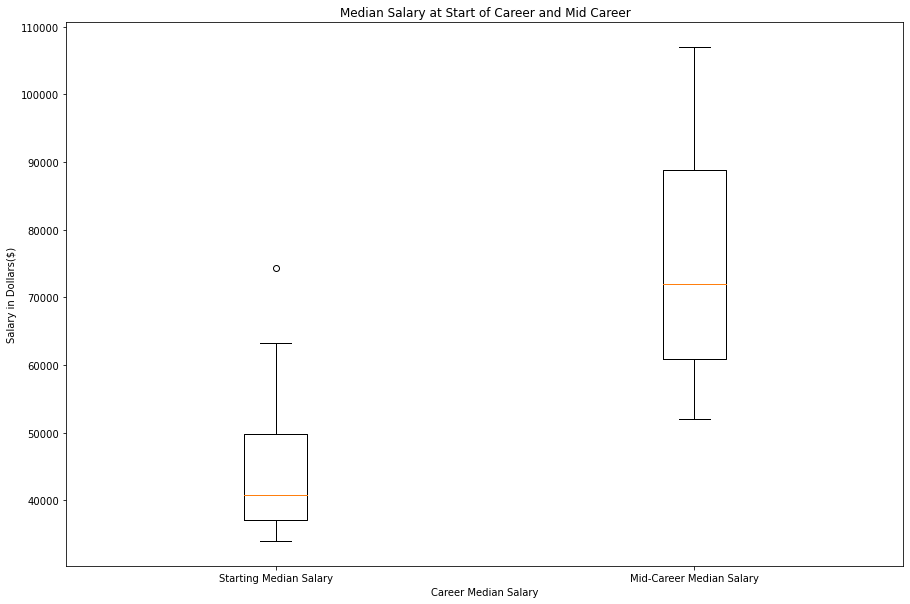

In [9]:
start_career = major_salary['Starting Median Salary'].astype(float)
mid_career = major_salary['Mid-Career Median Salary'].astype(float)
# print(type(start_career))
# print(type(mid_career))

plt.figure(figsize=(15,10))
plt.boxplot([start_career, mid_career])
plt.xticks([1, 2], ['Starting Median Salary', 'Mid-Career Median Salary'])
plt.xlabel("Career Median Salary")
plt.ylabel("Salary in Dollars($)")
plt.title("Median Salary at Start of Career and Mid Career")
plt.show()

<p style="font-size:150%">Check for any and all outliers for the column: Starting Median Salary in major_salary</p>

In [10]:
#Get any and all outliers for column Starting Median Salary in major_salary
iqr = start_career.quantile(0.75) - start_career.quantile(0.25)
min = start_career.quantile(0.25) - (1.5 * iqr)
max = start_career.quantile(0.75) + (1.5 * iqr)

min_df = major_salary.loc[major_salary['Starting Median Salary'].astype(float) < min]
max_df = major_salary.loc[major_salary['Starting Median Salary'].astype(float) > max]
outliers = pd.concat([min_df, max_df])
if(len(outliers) == 0):
    print("No outliers in column: Mid-Career Median Salary")
else:
    print("There are %d outlier(s) in column: Starting Median Salary\n" % len(outliers))
    print(outliers.head(len(outliers)))

There are 1 outlier(s) in column: Starting Median Salary

                    Starting Median Salary Mid-Career Median Salary
Undergraduate Major                                                
Physician Assistant               74300.00                 91700.00


<p style="font-size:150%">Check for any and all outliers for the column: Mid-Career Median Salary in major_salary</p>

In [11]:
#Get any and all outliers for column Mid-Career Median Salary in major_salary
iqr = mid_career.quantile(0.75) - mid_career.quantile(0.25)
min = mid_career.quantile(0.25) - (1.5 * iqr)
max = mid_career.quantile(0.75) + (1.5 * iqr)

min_df = major_salary.loc[major_salary['Mid-Career Median Salary'].astype(float) < min]
max_df = major_salary.loc[major_salary['Mid-Career Median Salary'].astype(float) > max]
outliers = pd.concat([min_df, max_df])
if(len(outliers) == 0):
    print("There are 0 outliers in column: Mid-Career Median Salary")
else:
    print("There are %d outlier(s) in column: Mid-Career Median Salary\n" % len(outliers))
    print(outliers.head(len(outliers)))

There are 0 outliers in column: Mid-Career Median Salary


<p style="font-size:150%">Create a bar graph comparing starting and mid-career median salary of each major that is listed</p>

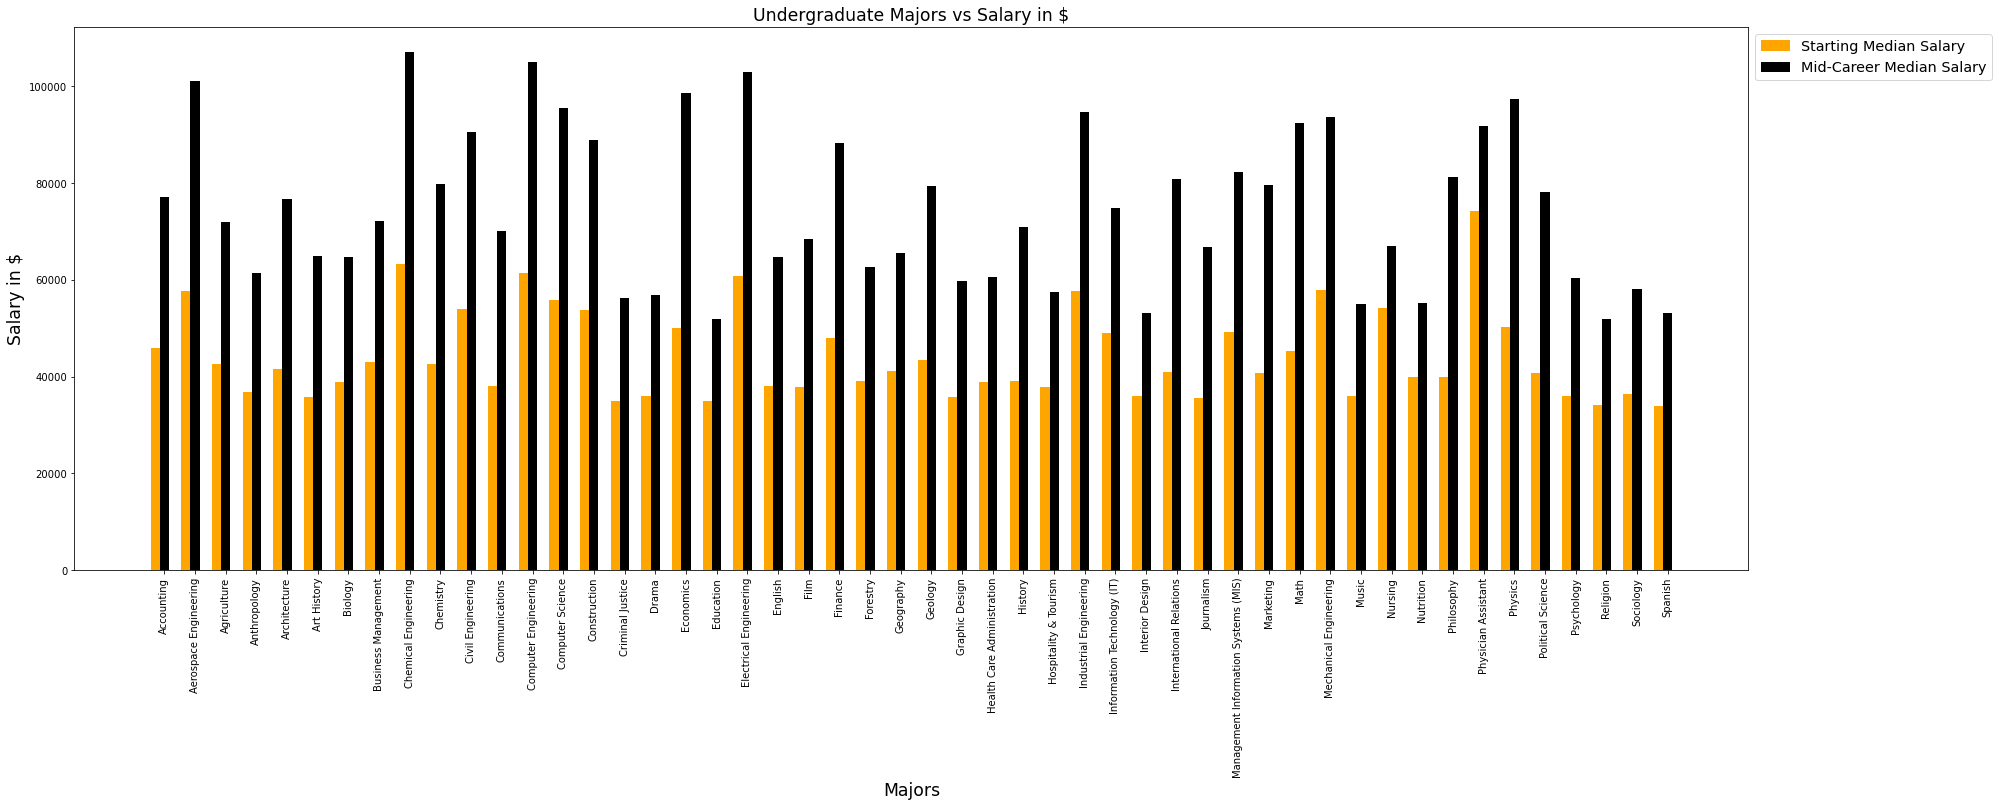

In [12]:
#Code for bar graph goes here
x_axis = major_salary.index
start_series = major_salary['Starting Median Salary'].astype(float)
mid_series = major_salary['Mid-Career Median Salary'].astype(float)
ind = 10*np.arange(len(x_axis))
wid = 3
plt.figure(figsize=(30,10))

plt.bar(ind, start_series, wid, label="Starting Median Salary", color='orange')
plt.bar(ind+wid, mid_series, wid, label="Mid-Career Median Salary", color='black')
plt.title("Undergraduate Majors vs Salary in $", fontsize="xx-large")
plt.xlabel("Majors", fontsize="xx-large")
plt.ylabel("Salary in $", fontsize="xx-large")
plt.xticks(ind+wid, x_axis, rotation='vertical')
plt.legend(loc=0, fontsize="x-large", bbox_to_anchor=(1.15,1))
# plt.savefig("graph1.jpg",dpi=288, quality=95)
plt.show()

#Planning on splitting this up into two different graphs for the next deliverable

<p style="font-size:250%"> Splitting above bar graph for better visibility</p>

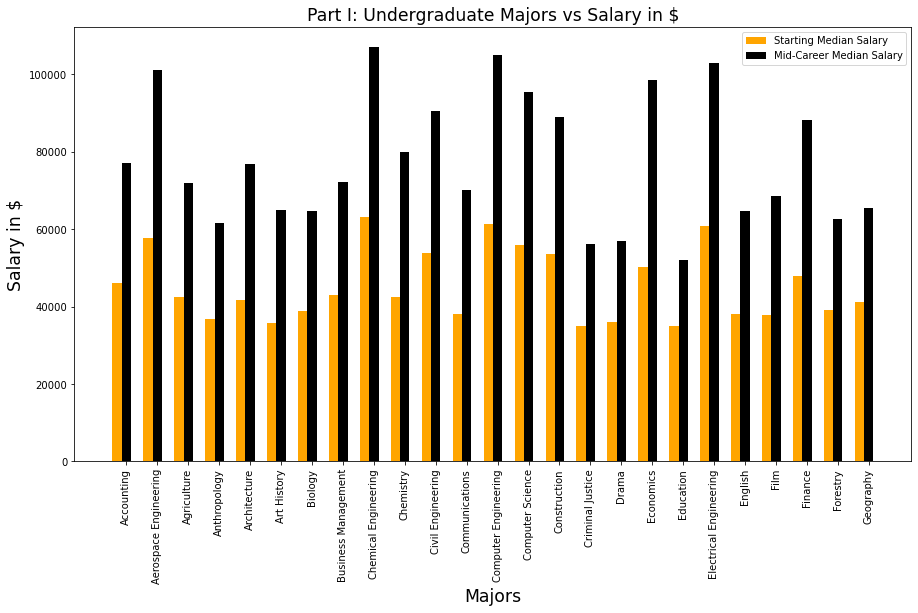

In [13]:
# Graphs made for better visibility on documentation
x_boi = x_axis[0:25]
ind = 10*np.arange(len(x_boi))
wid = 3
start_boi = start_series[0:25]
mid_boi = mid_series[0:25]
plt.figure(figsize=(15,8))
plt.bar(ind, start_boi, wid, label="Starting Median Salary", color='orange')
plt.bar(ind+wid, mid_boi, wid, label="Mid-Career Median Salary", color='black')
plt.title("Part I: Undergraduate Majors vs Salary in $", fontsize="xx-large")
plt.xlabel("Majors", fontsize="xx-large")
plt.ylabel("Salary in $", fontsize="xx-large")
plt.xticks(ind+wid, x_boi, rotation='vertical')
plt.legend(loc=0, fontsize="medium")#, bbox_to_anchor=(1.21,1))
# plt.savefig("graph1_1.jpg",dpi=288, quality=95)
plt.show()


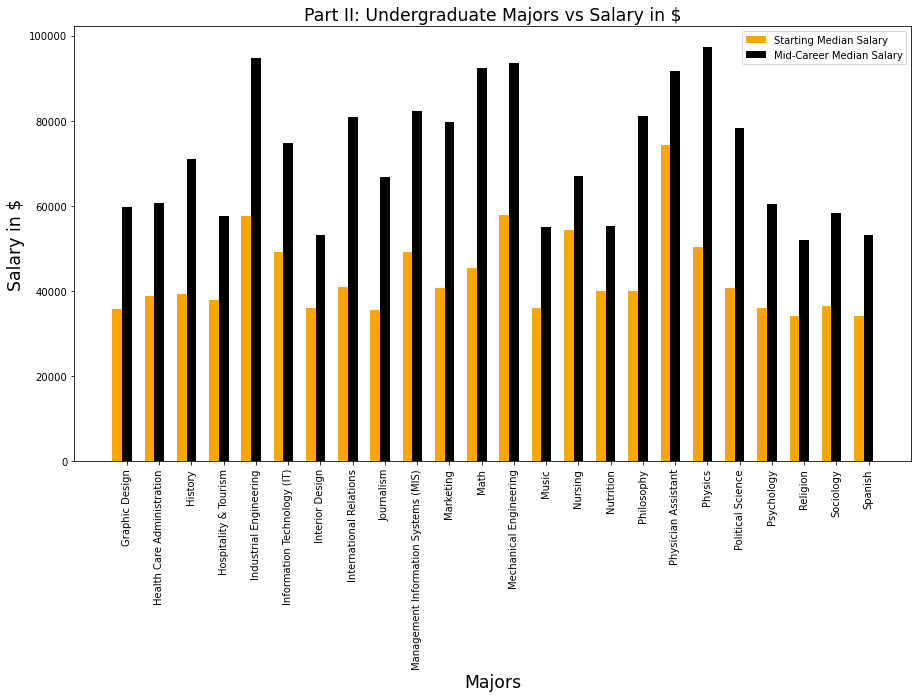

In [14]:
# Graphs made for better visibility on documentation
x_boi = x_axis[26:]
ind = 10*np.arange(len(x_boi))
wid = 3
start_boi = start_series[26:]
mid_boi = mid_series[26:]
plt.figure(figsize=(15,8))
plt.bar(ind, start_boi, wid, label="Starting Median Salary", color='orange')
plt.bar(ind+wid, mid_boi, wid, label="Mid-Career Median Salary", color='black')
plt.title("Part II: Undergraduate Majors vs Salary in $", fontsize="xx-large")
plt.xlabel("Majors", fontsize="xx-large")
plt.ylabel("Salary in $", fontsize="xx-large")
plt.xticks(ind+wid, x_boi, rotation='vertical')
plt.legend(loc=0, fontsize="medium")#, bbox_to_anchor=(1.21,1))
# plt.savefig("graph1_2.jpg",dpi=288, quality=95)
plt.show()

<h1 style="font-size:350%">Analysis on Dataframe: college_region</h1>

<p style="font-size:150%">Formatting string values in columns to be able to be used as integers in the future</p>

In [15]:
for y, x in college_region.iterrows():
    stSal = str(x['Starting Median Salary'])
    stSal_fin = stSal.replace('$', '').replace(',', '')
    x['Starting Median Salary'] = stSal_fin

    mdSal = str(x['Mid-Career Median Salary'])
    mdSal_fin = mdSal.replace('$', '').replace(',', '')
    x['Mid-Career Median Salary'] = mdSal_fin
    # print(x['Starting Median Salary'], x['Mid-Career Median Salary'])

<p style="font-size:150%">Checking for any and all duplicate values in dataframe major_salary</p>

In [16]:
#Check for any duplicate values:
duplicateBool= college_region.duplicated()
duplicates = college_region.loc[duplicateBool == True]
print("There are %i duplicate values in the dataset" % duplicates.shape[0])

There are 0 duplicate values in the dataset


<p style="font-size:150%">Check for any NaNs and replace them with the median value of the column</p>

In [17]:
stcr = college_region['Starting Median Salary'].astype(float)
col_df1 = stcr.fillna(stcr.median(skipna = True)).astype(float)
college_region['Starting Median Salary'] = col_df1
# print(col_df.head())

mdcr = college_region['Mid-Career Median Salary'].astype(float)
col_df2 = mdcr.fillna(mdcr.median(skipna = True)).astype(float)
college_region['Mid-Career Median Salary'] = col_df2

<p style="font-size:150%">Create a box plot to visualize the spread of data</p>

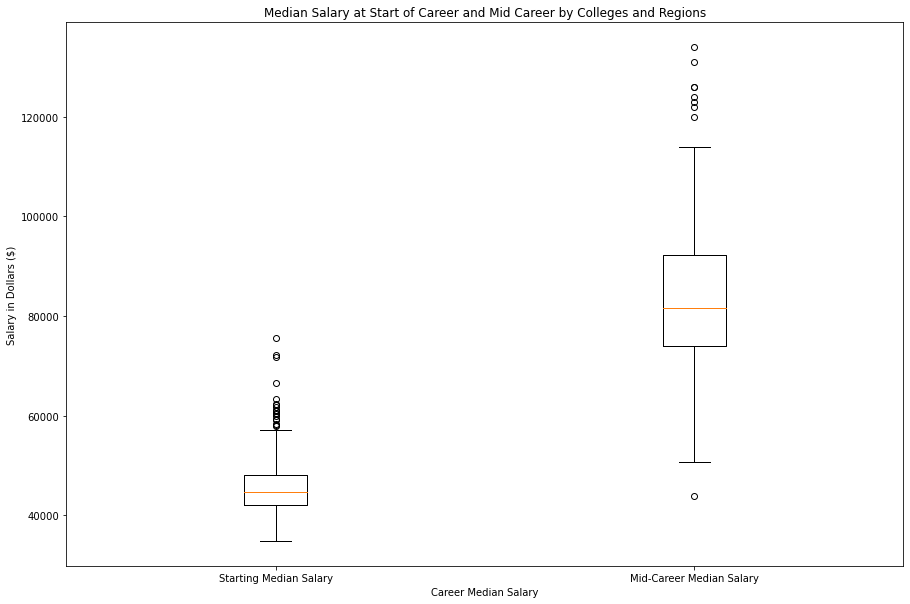

In [18]:
plt.figure(figsize = (15,10))
plt.boxplot([col_df1, col_df2])
plt.xticks([1, 2], ['Starting Median Salary', 'Mid-Career Median Salary'])
plt.xlabel("Career Median Salary")
plt.ylabel("Salary in Dollars ($)")
plt.title("Median Salary at Start of Career and Mid Career by Colleges and Regions")
plt.show()

<p style="font-size:150%">Check for any and all outliers for the column: Starting Median Salary in major_salary</p>

In [19]:
#Get any and all outliers for column Starting Median Salary in college_major
iqr = stcr.quantile(0.75) - stcr.quantile(0.25)
min = stcr.quantile(0.25) - (1.5 * iqr)
max = stcr.quantile(0.75) + (1.5 * iqr)

min_df = college_region.loc[college_region['Starting Median Salary'].astype(float) < min]
max_df = college_region.loc[college_region['Starting Median Salary'].astype(float) > max]
outliers = pd.concat([min_df, max_df])
if(len(outliers) == 0):
    print("There are 0 outliers in column: Starting Median Salary")
else:
    print("There are %d outlier(s) in column: Starting Median Salary\n" % len(outliers))
    print(outliers.head(len(outliers)))

There are 19 outlier(s) in column: Starting Median Salary

                                              School Type        Region  \
School Name                                                               
California Institute of Technology (CIT)      Engineering    California   
Carnegie Mellon University (CMU)              Engineering  Northeastern   
Colorado School of Mines                      Engineering       Western   
Columbia University                            Ivy League  Northeastern   
Cooper Union                                  Engineering  Northeastern   
Cornell University                             Ivy League  Northeastern   
Dartmouth College                              Ivy League  Northeastern   
Georgia Institute of Technology               Engineering      Southern   
Harvard University                             Ivy League  Northeastern   
Harvey Mudd College                           Engineering    California   
Massachusetts Institute of Technology (MI

<p style="font-size:150%">Check for any and all outliers for the column: Mid-Career Median Salary in major_salary</p>

In [20]:
#Get any and all outliers for column Mid-Career Median Salary in college_region
iqr = mdcr.quantile(0.75) - mdcr.quantile(0.25)
min = mdcr.quantile(0.25) - (1.5 * iqr)
max = mdcr.quantile(0.75) + (1.5 * iqr)

min_df = college_region.loc[college_region['Mid-Career Median Salary'].astype(float) < min]
max_df = college_region.loc[college_region['Mid-Career Median Salary'].astype(float) > max]
outliers = pd.concat([min_df, max_df])
if(len(outliers) == 0):
    print("There are 0 outliers in column: Mid-Career Median Salary")
else:
    print("There are %d outlier(s) in column: Mid-Career Median Salary\n" % len(outliers))
    print(outliers.head(len(outliers)))

There are 9 outlier(s) in column: Mid-Career Median Salary

                                             School Type        Region  \
School Name                                                              
Black Hills State University                       State    Midwestern   
California Institute of Technology (CIT)     Engineering    California   
Dartmouth College                             Ivy League  Northeastern   
Harvard University                            Ivy League  Northeastern   
Harvey Mudd College                          Engineering    California   
Massachusetts Institute of Technology (MIT)  Engineering  Northeastern   
Princeton University                          Ivy League  Northeastern   
University of Pennsylvania                    Ivy League  Northeastern   
Yale University                               Ivy League  Northeastern   

                                             Starting Median Salary  \
School Name                                           

<p style="font-size:150%">Check for NaN in the categorical column: region, and fill any NaN values with the mode value in the column</p>

In [21]:
college_region['Region'] = college_region['Region'].fillna(college_region['Region'].mode()[0])
reg = college_region['Region'].unique()

<p style="font-size:150%">Visualize the frequency of colleges in each region</p>

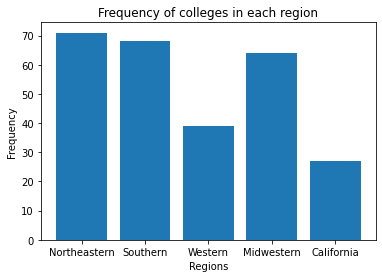

In [22]:
regn = college_region["Region"].unique()
freqRG = []
StartValsRG = []
MidValsRG = []
for k in range(len(regn)):
    x = 0
    for j in range(college_region.shape[0]):
        if regn[k] == college_region['Region'][j]:
            StartValsRG.append(college_region['Starting Median Salary'][j])
            MidValsRG.append(college_region['Mid-Career Median Salary'][j])
            x += 1
        else:
            continue
    freqRG.append(x)
    x = 0
plt.bar(reg, freqRG)
plt.title('Frequency of colleges in each region')
plt.xlabel('Regions')
plt.ylabel('Frequency')
plt.show()

<p style="font-size:150%">visualize the frequecy of college types for use in the future:</p>

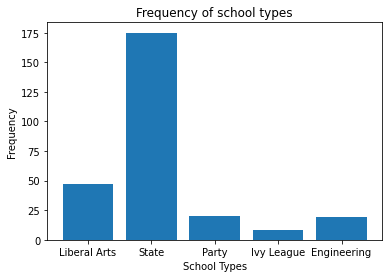

[47, 175, 20, 8, 19]


In [23]:
scltp = college_region["School Type"].unique()
frqST = []
StartValsST = []
MidValsST = []
for k in range(len(scltp)):
    x = 0
    for j in range(college_region.shape[0]):
        if scltp[k] == college_region['School Type'][j]:
            StartValsST.append(college_region['Starting Median Salary'][j])
            MidValsST.append(college_region['Mid-Career Median Salary'][j])
            x += 1
        else:
            continue
    frqST.append(x)
    x = 0
plt.bar(scltp, frqST)
plt.title('Frequency of school types')
plt.xlabel('School Types')
plt.ylabel('Frequency')
plt.show()
print(frqST)

<p style="font-size:150%">Make a graph comparing school type to average starting and mid-career salary</p>

In [24]:
grouped_type = college_region.groupby('School Type')
startMean = []
midMean = []
for group in grouped_type.groups.keys():
    startMean.append(grouped_type.get_group(group)['Starting Median Salary'].mean())
    midMean.append(grouped_type.get_group(group)['Mid-Career Median Salary'].mean())
# print(startMean)
# print(midMean)
# for i in range(len(startMean)):
#     print(((midMean[i] - startMean[i])/startMean[i])*100 , "\t\t", (midMean[i] - startMean[i]))

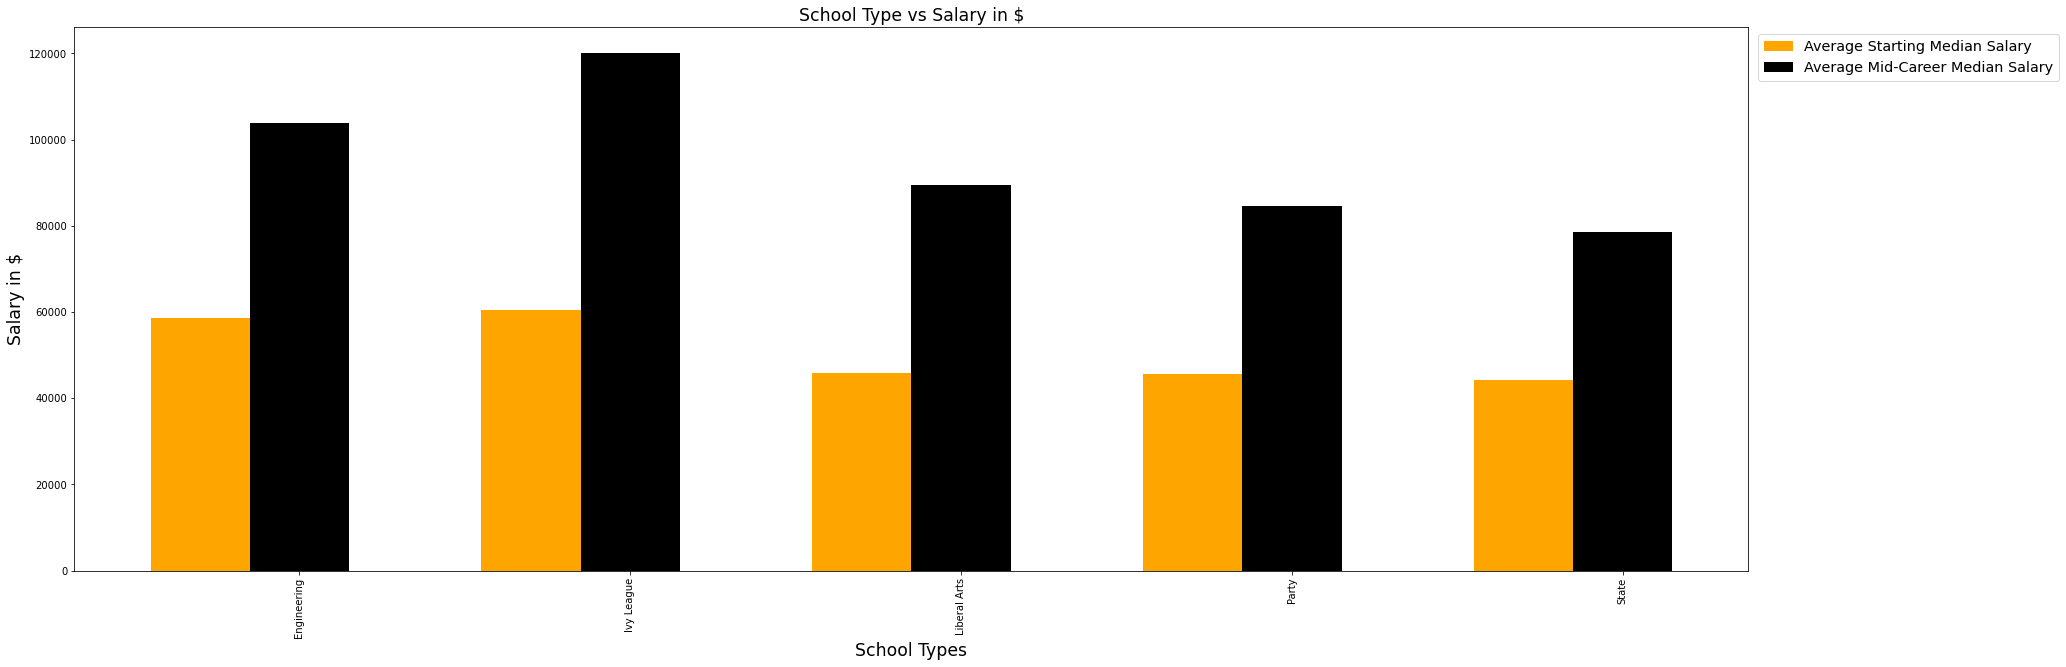

In [25]:
#Code Here
x_axis = grouped_type.groups.keys()
ind = 10 * np.arange(len(x_axis))
wid = 3
plt.figure(figsize = (30,10))
plt.bar(ind, startMean, wid, label = "Average Starting Median Salary", color = 'orange')
plt.bar(ind + wid, midMean, wid, label = "Average Mid-Career Median Salary", color = 'black')
plt.title("School Type vs Salary in $", fontsize = "xx-large")
plt.xlabel("School Types", fontsize = "xx-large")
plt.ylabel("Salary in $", fontsize = "xx-large")
plt.xticks(ind + wid, x_axis, rotation = 'vertical')
plt.legend(loc = 0, fontsize = "x-large", bbox_to_anchor = (1.19,1))
plt.show()

<p style="font-size:150%">Make a graph comparing college region to average starting and mid-career salary</p>

In [26]:
grouped_region = college_region.groupby('Region')
startMean = []
midMean = []
for group in grouped_region.groups.keys():
    startMean.append(grouped_region.get_group(group)['Starting Median Salary'].mean())
    midMean.append(grouped_region.get_group(group)['Mid-Career Median Salary'].mean())
# print(startMean)
# print(midMean)
# for i in range(len(startMean)):
#     print(((midMean[i] - startMean[i])/startMean[i])*100 , "\t\t", (midMean[i] - startMean[i]))

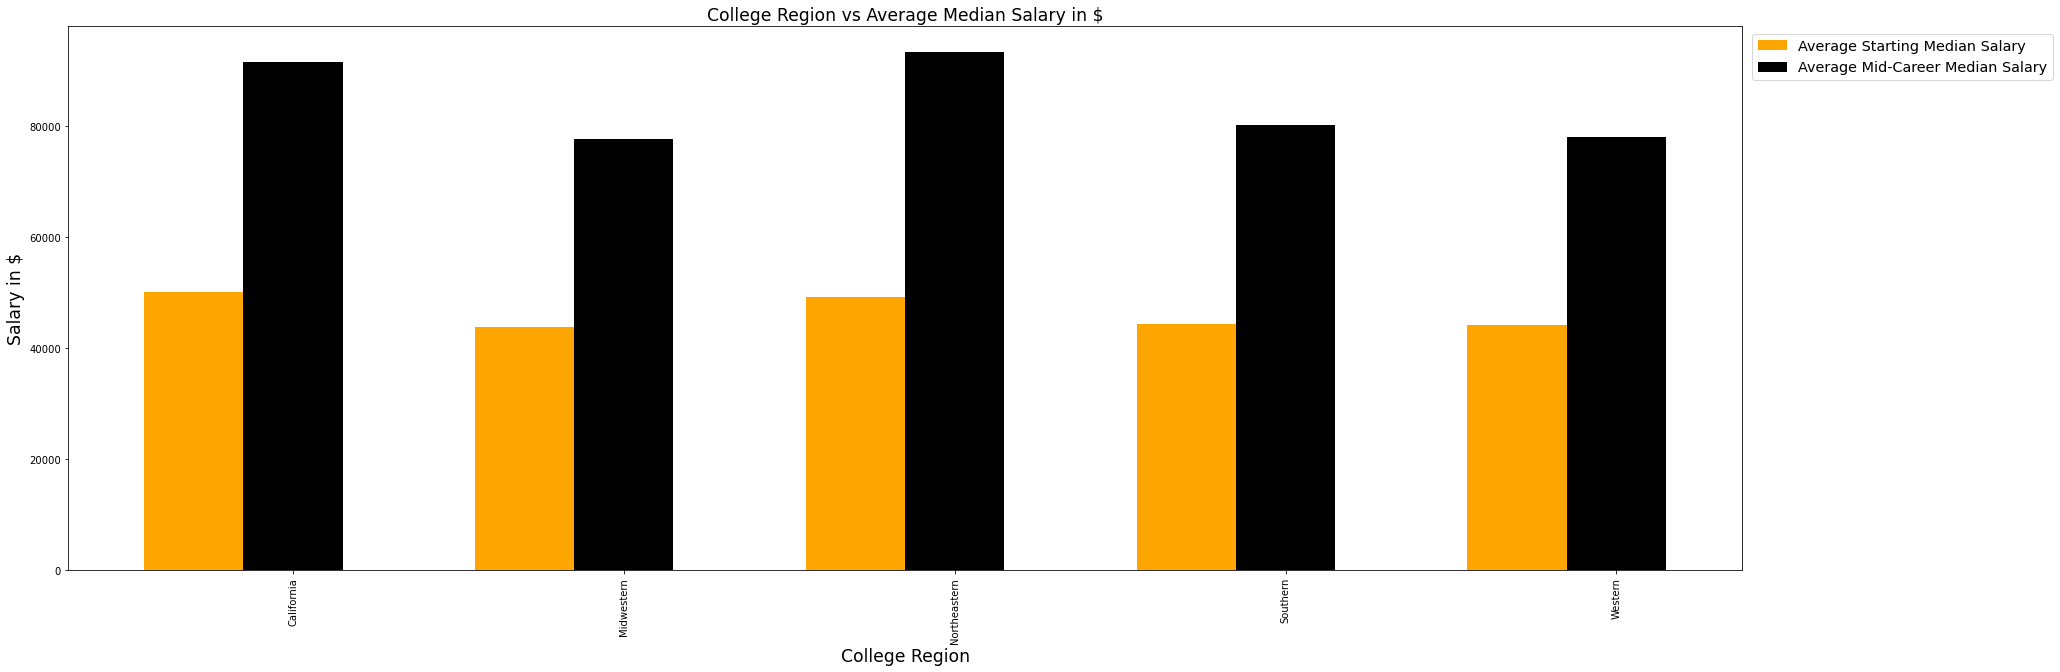

In [27]:
#Code Here
x_axis = grouped_region.groups.keys()
ind = 10 * np.arange(len(x_axis))
wid = 3
plt.figure(figsize = (30,10))
plt.bar(ind, startMean, wid, label = "Average Starting Median Salary", color = 'orange')
plt.bar(ind + wid, midMean, wid, label = "Average Mid-Career Median Salary", color = 'black')
plt.title("College Region vs Average Median Salary in $", fontsize = "xx-large")
plt.xlabel("College Region", fontsize = "xx-large")
plt.ylabel("Salary in $", fontsize = "xx-large")
plt.xticks(ind + wid, x_axis, rotation = 'vertical')
plt.legend(loc = 0, fontsize = "x-large", bbox_to_anchor = (1.19,1))
plt.show()

<p style="font-size:150%">Make a graph comparing college name vs starting and mid-career salary</p>

In [98]:
#Code Here
y_axis = college_region.index
SMS = college_region['Starting Median Salary'].astype(float)
MMS = college_region['Mid-Career Median Salary'].astype(float)
ind = 60 * np.arange(len(y_axis))
wid = 15
plt.figure(figsize = (30,100))
plt.barh(ind, SMS, wid, label = "Average Starting Median Salary", color = 'orange')
plt.barh(ind + wid, MMS, wid, label = "Average Mid-Career Median Salary", color = 'black')
plt.title("School Name vs Average Median Salary in $", fontsize = "xx-large")
plt.ylabel("School Name", fontsize = "xx-large")
plt.xlabel("Salary in $", fontsize = "xx-large")
plt.yticks(ind + wid, y_axis, rotation = 'horizontal')
plt.legend(loc = 0, fontsize = "x-large", bbox_to_anchor = (1.15,1))
plt.close()
# plt.show()
print(college_region.loc[college_region['Starting Median Salary'] == SMS.max()]['Starting Median Salary'], "\n")
print(college_region.loc[college_region['Starting Median Salary'] == SMS.min()]['Starting Median Salary'], "\n\n")
print(college_region.loc[college_region['Mid-Career Median Salary'] == MMS.max()]['Mid-Career Median Salary'], "\n")
print(college_region.loc[college_region['Mid-Career Median Salary'] == MMS.min()]['Mid-Career Median Salary'])

School Name
California Institute of Technology (CIT)    75500.0
Name: Starting Median Salary, dtype: float64 

School Name
Morehead State University    34800.0
Name: Starting Median Salary, dtype: float64 


School Name
Dartmouth College    134000.0
Name: Mid-Career Median Salary, dtype: float64 

School Name
Black Hills State University    43900.0
Name: Mid-Career Median Salary, dtype: float64


<p style="font-size:250%"> Splitting above bar graph for better visibility</p>

In [29]:
keys = list(grouped_type.groups.keys())
# len(keys)
one = keys[0]
two = keys[1]
three = keys[2]
four = keys[3]
five = keys[4]
# print(one, "\n", two, "\n", three, "\n", four, "\n",five)

<p style="font-size:250%">Ivy League vs Average Median Salary in $</p>

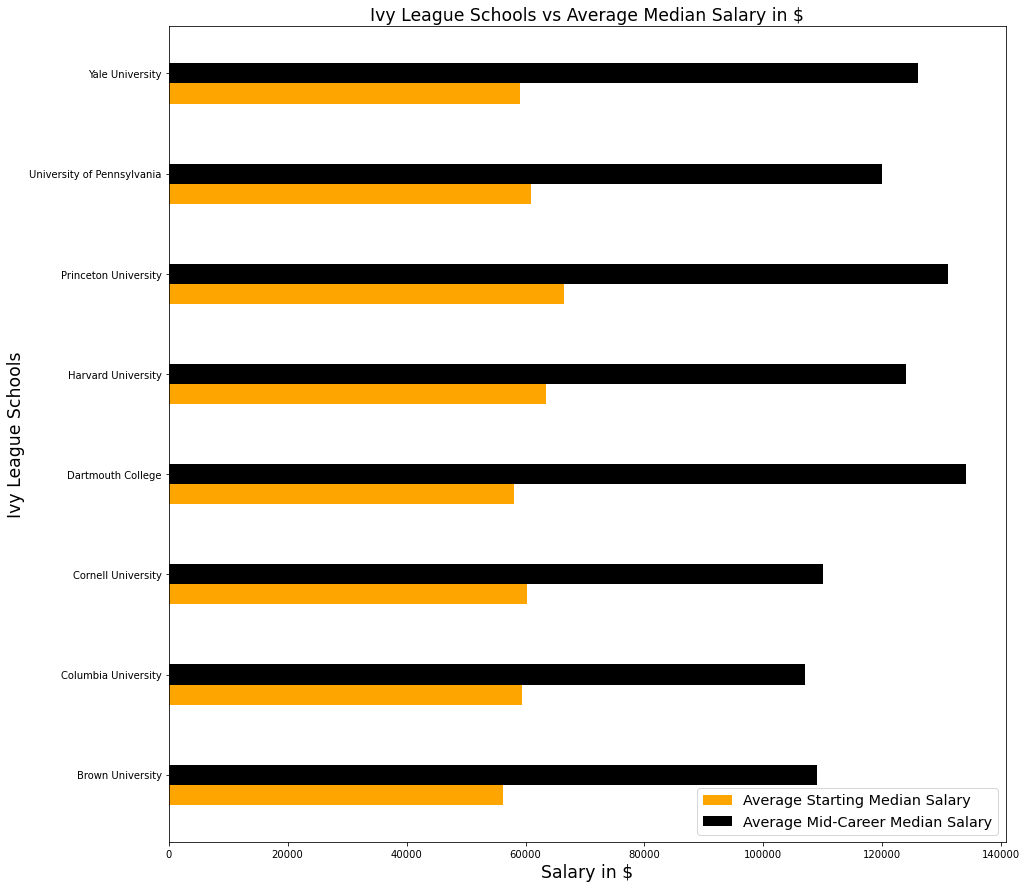

In [116]:
# Ivy League
# print(len(grouped_type.get_group(two)))
currGroup = grouped_type.get_group(two)
y_axis = currGroup.index
SMS = currGroup['Starting Median Salary'].astype(float)
MMS = currGroup['Mid-Career Median Salary'].astype(float)
ind = 10 * np.arange(len(y_axis))
wid = 2
plt.figure(figsize = (15,15))
plt.barh(ind, SMS, wid, label = "Average Starting Median Salary", color = 'orange')
plt.barh(ind + wid, MMS, wid, label = "Average Mid-Career Median Salary", color = 'black')
plt.title("Ivy League Schools vs Average Median Salary in $", fontsize = "xx-large")
plt.ylabel("Ivy League Schools", fontsize = "xx-large")
plt.xlabel("Salary in $", fontsize = "xx-large")
plt.yticks(ind + wid, y_axis, rotation = 'horizontal')
plt.legend(loc = 0, fontsize = "x-large")#, bbox_to_anchor = (1.15,1))
# plt.savefig("ivy_league.jpg", dpi=288, quality=95)
# plt.close()
plt.show()
# print(currGroup.loc[currGroup['Starting Median Salary'] == SMS.max()]['Starting Median Salary'], "\n")
# print(currGroup.loc[currGroup['Starting Median Salary'] == SMS.min()]['Starting Median Salary'], "\n\n")
# print(currGroup.loc[currGroup['Mid-Career Median Salary'] == MMS.max()]['Mid-Career Median Salary'], "\n")
# print(currGroup.loc[currGroup['Mid-Career Median Salary'] == MMS.min()]['Mid-Career Median Salary'])

<p style="font-size:250%">Engineering vs Average Median Salary in $</p>

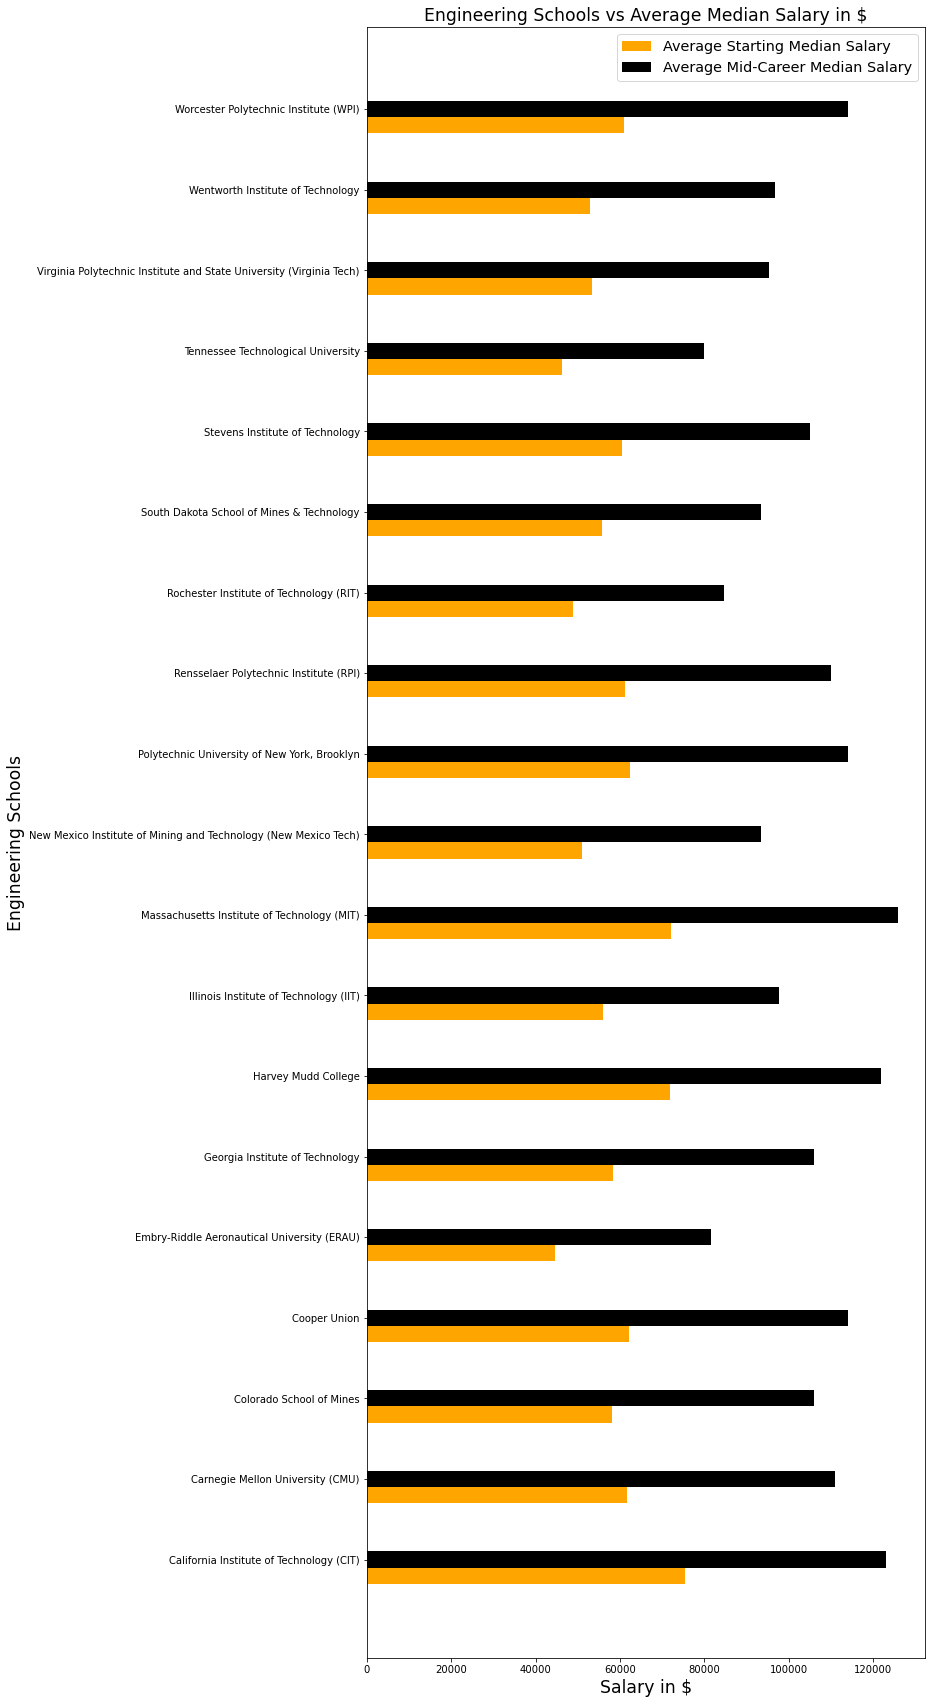

In [117]:
# Engineering
# print(len(grouped_type.get_group(one)))
currGroup = grouped_type.get_group(one)
y_axis = currGroup.index
SMS = currGroup['Starting Median Salary'].astype(float)
MMS = currGroup['Mid-Career Median Salary'].astype(float)
ind = 10 * np.arange(len(y_axis))
wid = 2
plt.figure(figsize = (10,30))
plt.barh(ind, SMS, wid, label = "Average Starting Median Salary", color = 'orange')
plt.barh(ind + wid, MMS, wid, label = "Average Mid-Career Median Salary", color = 'black')
plt.title("Engineering Schools vs Average Median Salary in $", fontsize = "xx-large")
plt.ylabel("Engineering Schools", fontsize = "xx-large")
plt.xlabel("Salary in $", fontsize = "xx-large")
plt.yticks(ind + wid, y_axis, rotation = 'horizontal')
plt.legend(loc = 0, fontsize = "x-large")#, bbox_to_anchor = (1.15,1))
# plt.close()
plt.show()
# print(currGroup.loc[currGroup['Starting Median Salary'] == SMS.max()]['Starting Median Salary'], "\n")
# print(currGroup.loc[currGroup['Starting Median Salary'] == SMS.min()]['Starting Median Salary'], "\n\n")
# print(currGroup.loc[currGroup['Mid-Career Median Salary'] == MMS.max()]['Mid-Career Median Salary'], "\n")
# print(currGroup.loc[currGroup['Mid-Career Median Salary'] == MMS.min()]['Mid-Career Median Salary'])

<p style="font-size:250%">Liberal Arts vs Average Median Salary in $</p>

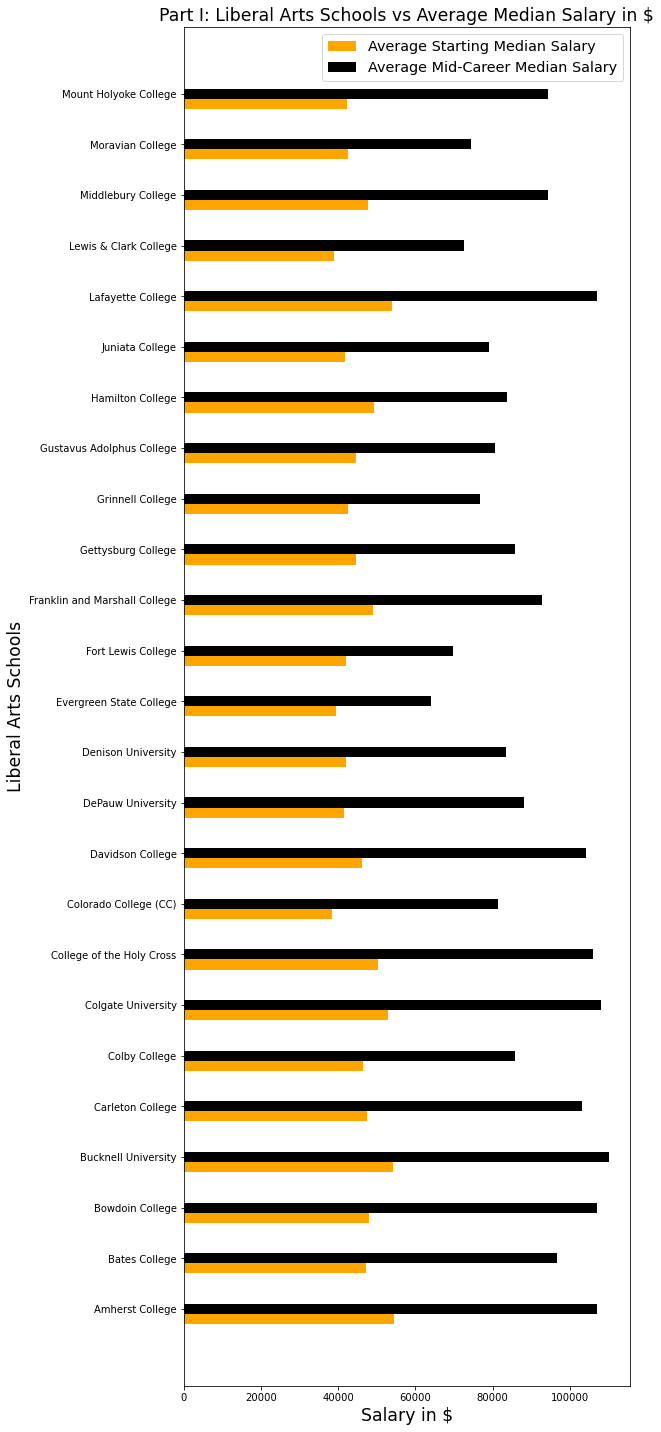

In [118]:
# Liberal Arts
# print(len(grouped_type.get_group(three)))
currGroup = grouped_type.get_group(three)
y_axis = currGroup.index[0:25]
SMS = currGroup['Starting Median Salary'].astype(float)[0:25]
MMS = currGroup['Mid-Career Median Salary'].astype(float)[0:25]
ind = 10 * np.arange(len(y_axis))
wid = 2
plt.figure(figsize = (8,25))
plt.barh(ind, SMS, wid, label = "Average Starting Median Salary", color = 'orange')
plt.barh(ind + wid, MMS, wid, label = "Average Mid-Career Median Salary", color = 'black')
plt.title("Part I: Liberal Arts Schools vs Average Median Salary in $", fontsize = "xx-large")
plt.ylabel("Liberal Arts Schools", fontsize = "xx-large")
plt.xlabel("Salary in $", fontsize = "xx-large")
plt.yticks(ind + wid, y_axis, rotation = 'horizontal')
plt.legend(loc = 0, fontsize = "x-large")#, bbox_to_anchor = (1.15,1))
# plt.savefig("liberal_arts_1.jpg", dpi=288, quality=95)
# plt.close()
plt.show()
# print(currGroup.loc[currGroup['Starting Median Salary'] == SMS.max()]['Starting Median Salary'], "\n")
# print(currGroup.loc[currGroup['Starting Median Salary'] == SMS.min()]['Starting Median Salary'], "\n\n")
# print(currGroup.loc[currGroup['Mid-Career Median Salary'] == MMS.max()]['Mid-Career Median Salary'], "\n")
# print(currGroup.loc[currGroup['Mid-Career Median Salary'] == MMS.min()]['Mid-Career Median Salary'])

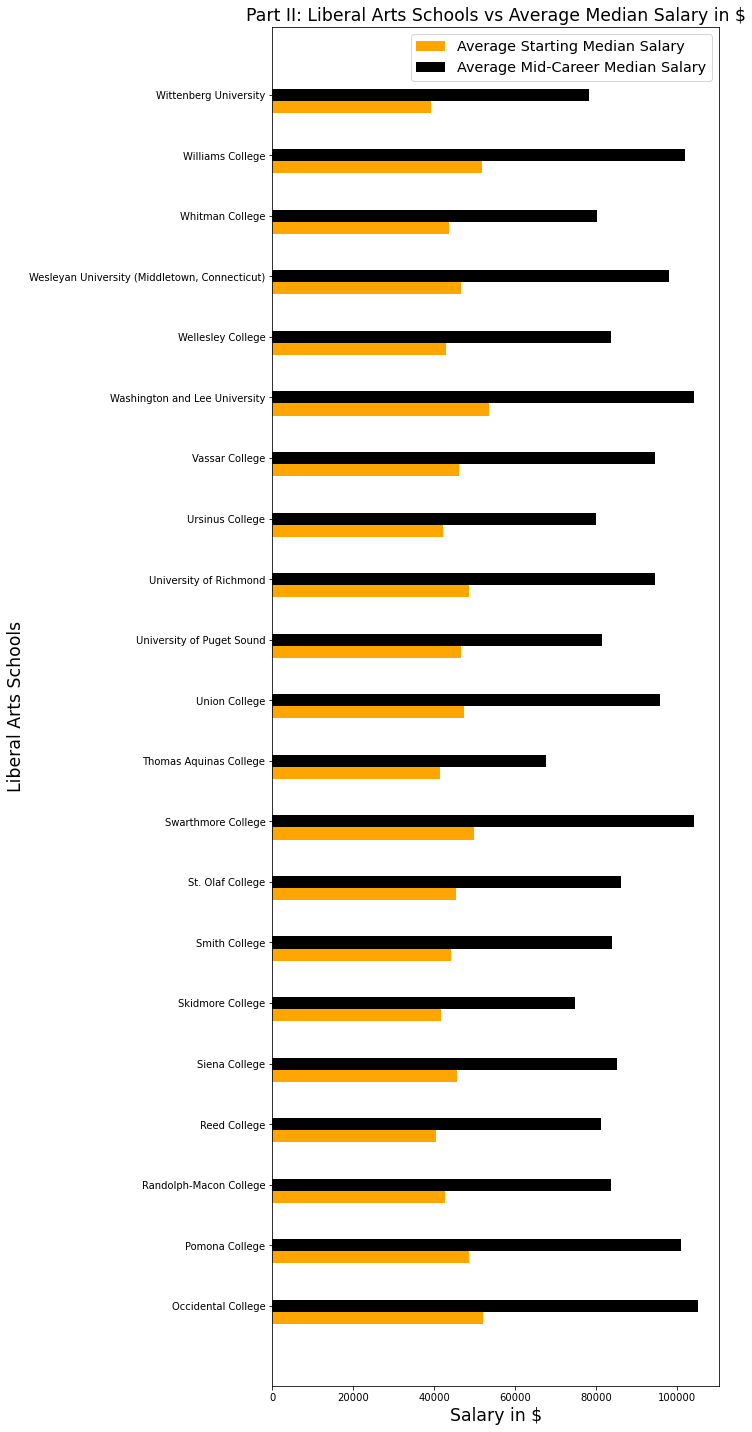

In [119]:
y_axis = currGroup.index[26:]
SMS = currGroup['Starting Median Salary'].astype(float)[26:]
MMS = currGroup['Mid-Career Median Salary'].astype(float)[26:]
ind = 10 * np.arange(len(y_axis))
wid = 2
plt.figure(figsize = (8,25))
plt.barh(ind, SMS, wid, label = "Average Starting Median Salary", color = 'orange')
plt.barh(ind + wid, MMS, wid, label = "Average Mid-Career Median Salary", color = 'black')
plt.title("Part II: Liberal Arts Schools vs Average Median Salary in $", fontsize = "xx-large")
plt.ylabel("Liberal Arts Schools", fontsize = "xx-large")
plt.xlabel("Salary in $", fontsize = "xx-large")
plt.yticks(ind + wid, y_axis, rotation = 'horizontal')
plt.legend(loc = 0, fontsize = "x-large")#, bbox_to_anchor = (1.15,1))
# plt.savefig("liberal_arts_2.jpg", dpi=288, quality=95)
# plt.close()
plt.show()
# print(currGroup.loc[currGroup['Starting Median Salary'] == SMS.max()]['Starting Median Salary'], "\n")
# print(currGroup.loc[currGroup['Starting Median Salary'] == SMS.min()]['Starting Median Salary'], "\n\n")
# print(currGroup.loc[currGroup['Mid-Career Median Salary'] == MMS.max()]['Mid-Career Median Salary'], "\n")
# print(currGroup.loc[currGroup['Mid-Career Median Salary'] == MMS.min()]['Mid-Career Median Salary'])

<p style="font-size:250%">Party vs Average Median Salary in $</p>

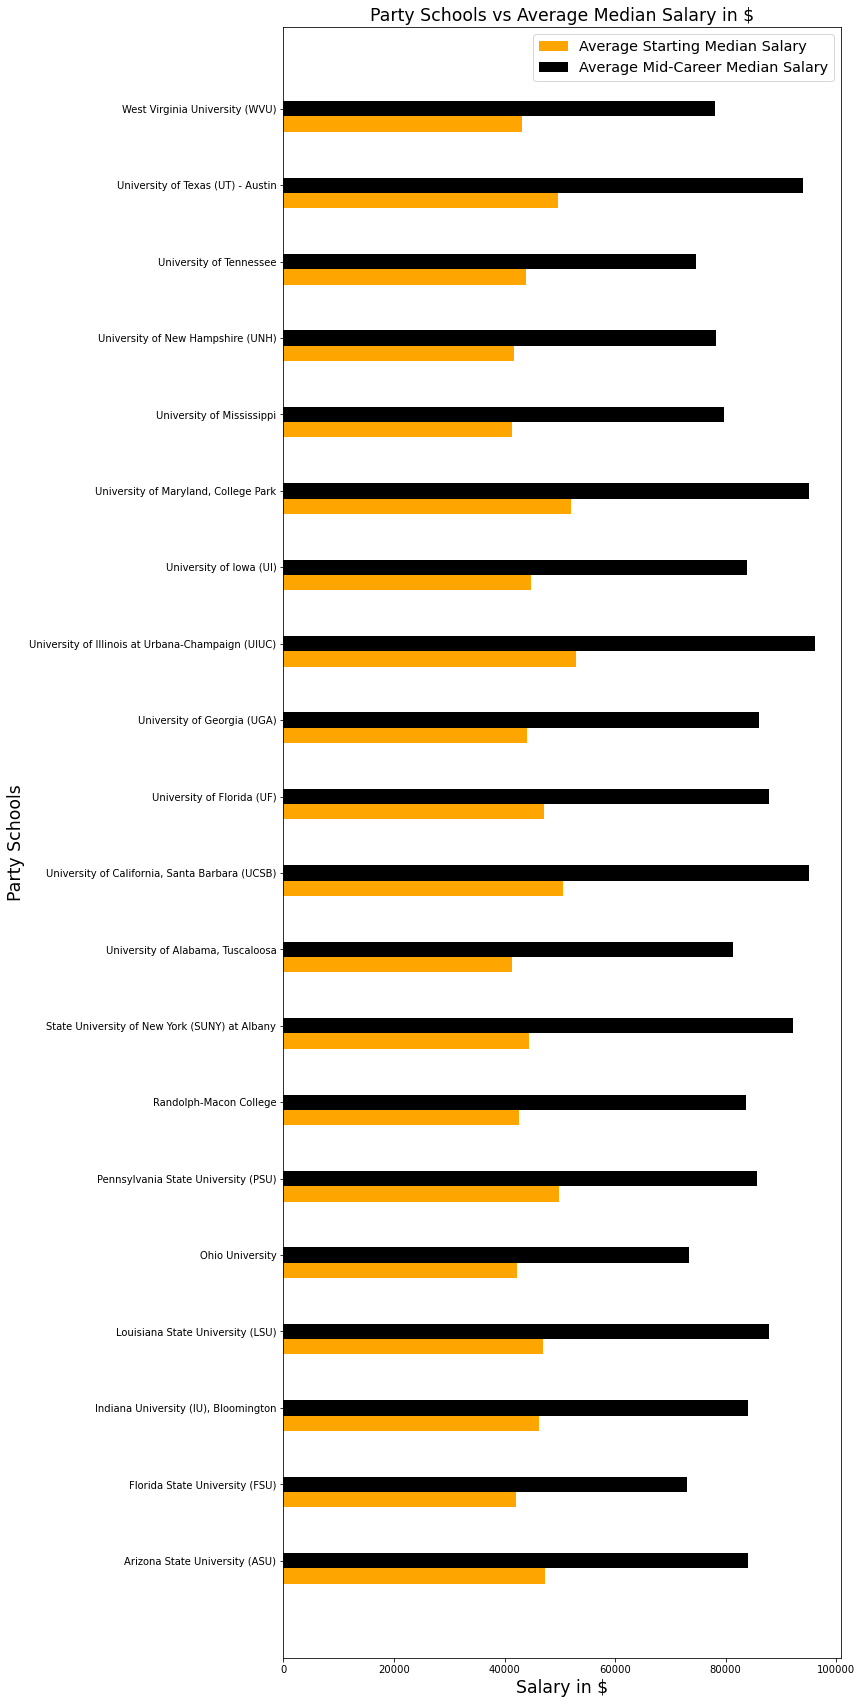

In [120]:
# Party
# print(len(grouped_type.get_group(four)))
currGroup = grouped_type.get_group(four)
y_axis = currGroup.index
SMS = currGroup['Starting Median Salary'].astype(float)
MMS = currGroup['Mid-Career Median Salary'].astype(float)
ind = 10 * np.arange(len(y_axis))
wid = 2
plt.figure(figsize = (10,30))
plt.barh(ind, SMS, wid, label = "Average Starting Median Salary", color = 'orange')
plt.barh(ind + wid, MMS, wid, label = "Average Mid-Career Median Salary", color = 'black')
plt.title("Party Schools vs Average Median Salary in $", fontsize = "xx-large")
plt.ylabel("Party Schools", fontsize = "xx-large")
plt.xlabel("Salary in $", fontsize = "xx-large")
plt.yticks(ind + wid, y_axis, rotation = 'horizontal')
plt.legend(loc = 0, fontsize = "x-large")#, bbox_to_anchor = (1.15,1))
# plt.close()
plt.show()
# print(currGroup.loc[currGroup['Starting Median Salary'] == SMS.max()]['Starting Median Salary'], "\n")
# print(currGroup.loc[currGroup['Starting Median Salary'] == SMS.min()]['Starting Median Salary'], "\n\n")
# print(currGroup.loc[currGroup['Mid-Career Median Salary'] == MMS.max()]['Mid-Career Median Salary'], "\n")
# print(currGroup.loc[currGroup['Mid-Career Median Salary'] == MMS.min()]['Mid-Career Median Salary'])

<p style="font-size:250%">Splitting state schools by region for better visibility on bar charts</p>

In [121]:
# State
print(len(grouped_type.get_group(five)))
stateByRegion = grouped_type.get_group(five).groupby('Region')
regions = list(stateByRegion.groups.keys())
cal = regions[0]
mid = regions[1]
nor = regions[2]
sou = regions[3]
wes = regions[4]
# print(cal, mid, nor, sou, wes)
# for r in regions:
#     print(r, "\t", len(stateByRegion.get_group(r)))
# currGroup = grouped_type.get_group(five)
# print(currGroup.loc[currGroup['Starting Median Salary'] == SMS.max()]['Starting Median Salary'], "\n")
# print(currGroup.loc[currGroup['Starting Median Salary'] == SMS.min()]['Starting Median Salary'], "\n\n")
# print(currGroup.loc[currGroup['Mid-Career Median Salary'] == MMS.max()]['Mid-Career Median Salary'], "\n")
# print(currGroup.loc[currGroup['Mid-Career Median Salary'] == MMS.min()]['Mid-Career Median Salary'])

175


<p style="font-size:250%">State (California) vs Average Median Salary in $</p>

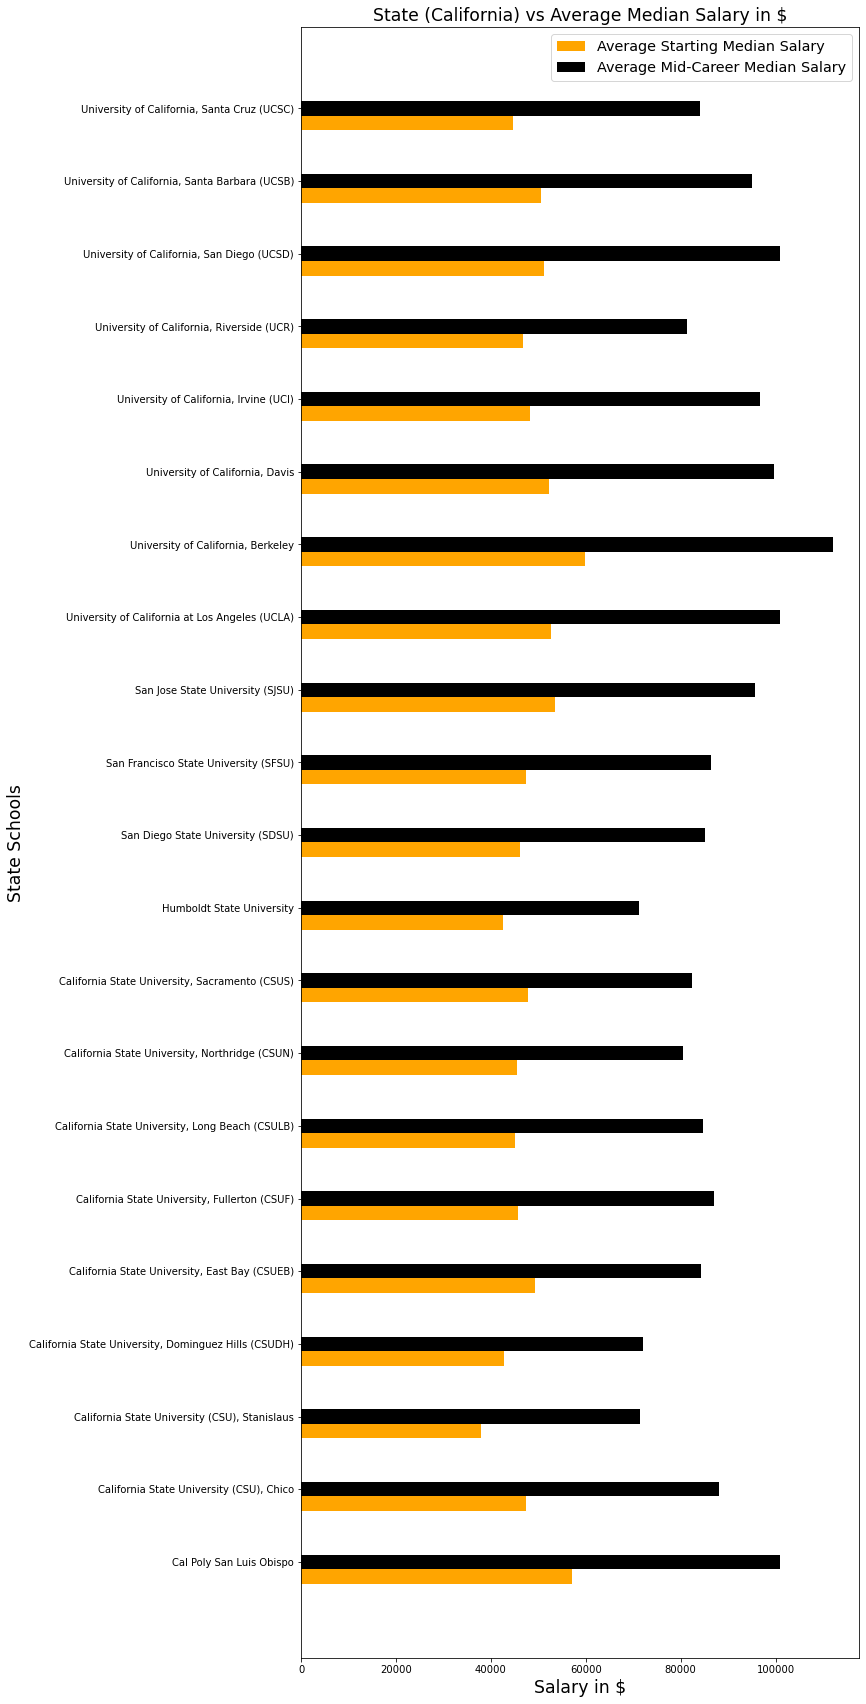

In [122]:
# State (California)
currGroup = stateByRegion.get_group(cal)
y_axis = currGroup.index
SMS = currGroup['Starting Median Salary'].astype(float)
MMS = currGroup['Mid-Career Median Salary'].astype(float)
ind = 10 * np.arange(len(y_axis))
wid = 2
plt.figure(figsize = (10,30))
plt.barh(ind, SMS, wid, label = "Average Starting Median Salary", color = 'orange')
plt.barh(ind + wid, MMS, wid, label = "Average Mid-Career Median Salary", color = 'black')
plt.title("State (California) vs Average Median Salary in $", fontsize = "xx-large")
plt.ylabel("State Schools", fontsize = "xx-large")
plt.xlabel("Salary in $", fontsize = "xx-large")
plt.yticks(ind + wid, y_axis, rotation = 'horizontal')
plt.legend(loc = 0, fontsize = "x-large")#, bbox_to_anchor = (1.15,1))
# plt.close()
plt.show()
# print(currGroup.loc[currGroup['Starting Median Salary'] == SMS.max()]['Starting Median Salary'], "\n")
# print(currGroup.loc[currGroup['Starting Median Salary'] == SMS.min()]['Starting Median Salary'], "\n\n")
# print(currGroup.loc[currGroup['Mid-Career Median Salary'] == MMS.max()]['Mid-Career Median Salary'], "\n")
# print(currGroup.loc[currGroup['Mid-Career Median Salary'] == MMS.min()]['Mid-Career Median Salary'])

<p style="font-size:250%">State (Midwestern) vs Average Median Salary in $</p>

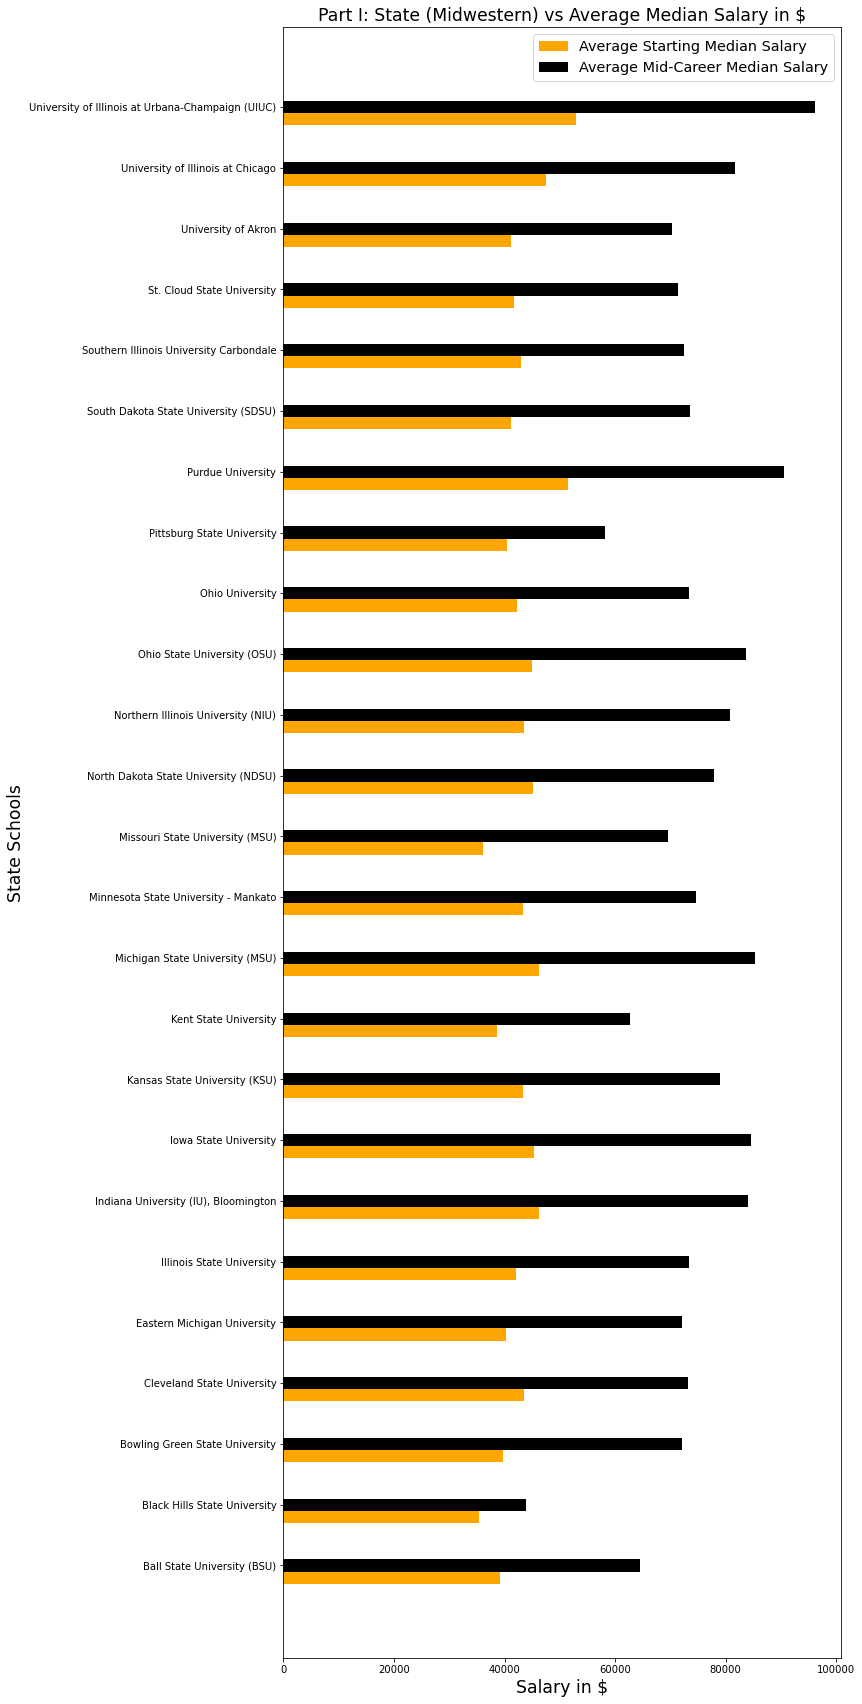

In [123]:
# State (Midwestern)
currGroup = stateByRegion.get_group(mid)
y_axis = currGroup.index[0:25]
SMS = currGroup['Starting Median Salary'].astype(float)[0:25]
MMS = currGroup['Mid-Career Median Salary'].astype(float)[0:25]
ind = 10 * np.arange(len(y_axis))
wid = 2
plt.figure(figsize = (10,30))
plt.barh(ind, SMS, wid, label = "Average Starting Median Salary", color = 'orange')
plt.barh(ind + wid, MMS, wid, label = "Average Mid-Career Median Salary", color = 'black')
plt.title("Part I: State (Midwestern) vs Average Median Salary in $", fontsize = "xx-large")
plt.ylabel("State Schools", fontsize = "xx-large")
plt.xlabel("Salary in $", fontsize = "xx-large")
plt.yticks(ind + wid, y_axis, rotation = 'horizontal')
plt.legend(loc = 0, fontsize = "x-large")#, bbox_to_anchor = (1.15,1))
# plt.close()
plt.show()
# print(currGroup.loc[currGroup['Starting Median Salary'] == SMS.max()]['Starting Median Salary'], "\n")
# print(currGroup.loc[currGroup['Starting Median Salary'] == SMS.min()]['Starting Median Salary'], "\n\n")
# print(currGroup.loc[currGroup['Mid-Career Median Salary'] == MMS.max()]['Mid-Career Median Salary'], "\n")
# print(currGroup.loc[currGroup['Mid-Career Median Salary'] == MMS.min()]['Mid-Career Median Salary'])

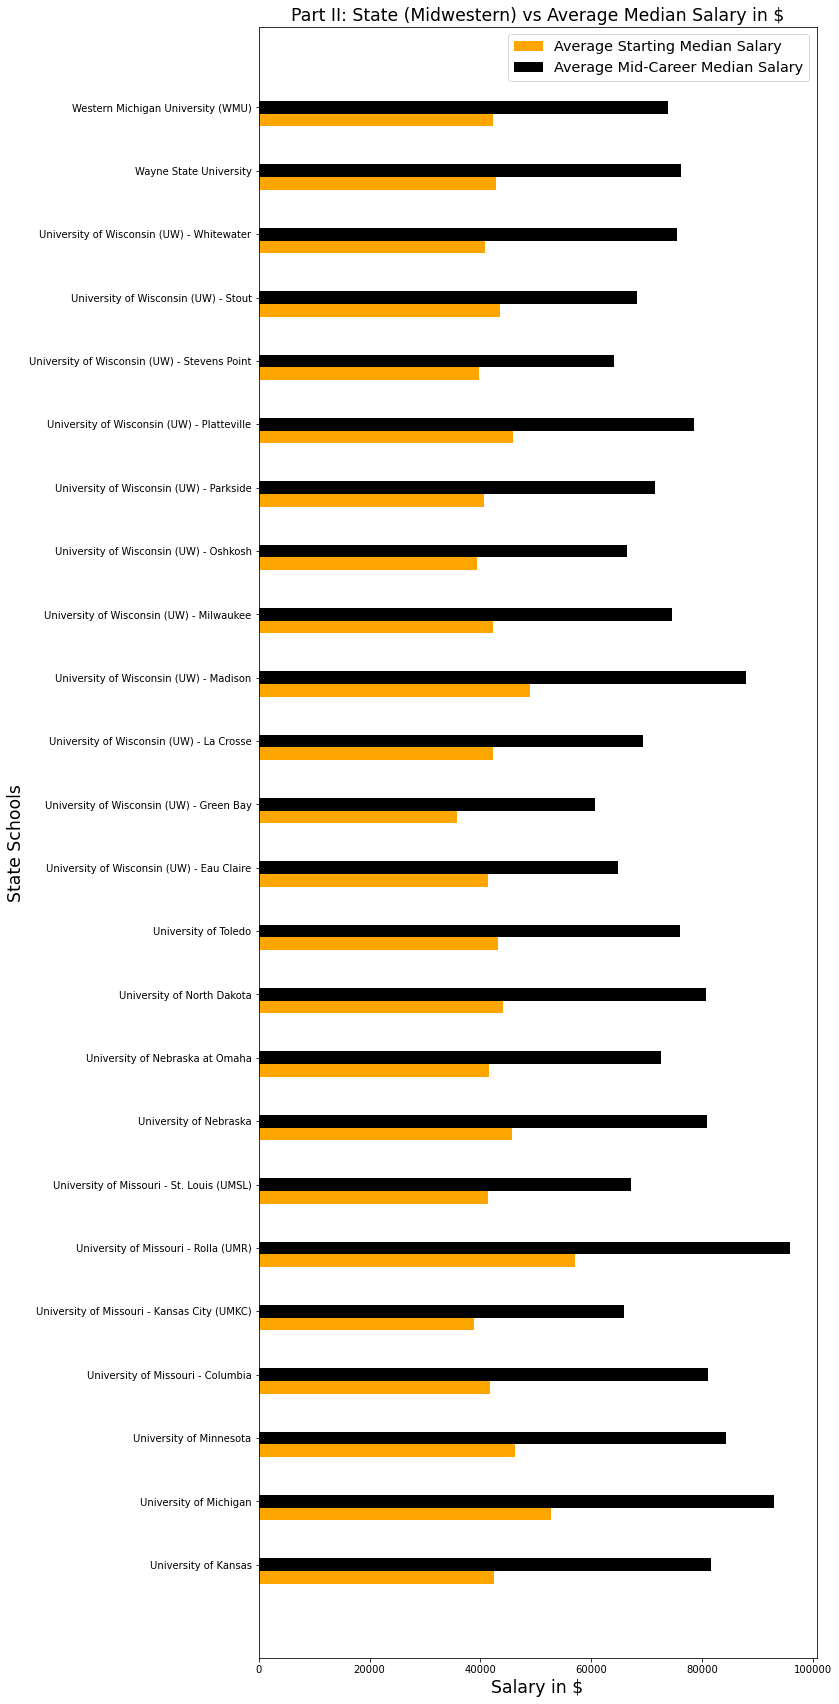

In [124]:
# State (Midwestern)
currGroup = stateByRegion.get_group(mid)
y_axis = currGroup.index[26:]
SMS = currGroup['Starting Median Salary'].astype(float)[26:]
MMS = currGroup['Mid-Career Median Salary'].astype(float)[26:]
ind = 10 * np.arange(len(y_axis))
wid = 2
plt.figure(figsize = (10,30))
plt.barh(ind, SMS, wid, label = "Average Starting Median Salary", color = 'orange')
plt.barh(ind + wid, MMS, wid, label = "Average Mid-Career Median Salary", color = 'black')
plt.title("Part II: State (Midwestern) vs Average Median Salary in $", fontsize = "xx-large")
plt.ylabel("State Schools", fontsize = "xx-large")
plt.xlabel("Salary in $", fontsize = "xx-large")
plt.yticks(ind + wid, y_axis, rotation = 'horizontal')
plt.legend(loc = 0, fontsize = "x-large")#, bbox_to_anchor = (1.15,1))
# plt.close()
plt.show()
# print(currGroup.loc[currGroup['Starting Median Salary'] == SMS.max()]['Starting Median Salary'], "\n")
# print(currGroup.loc[currGroup['Starting Median Salary'] == SMS.min()]['Starting Median Salary'], "\n\n")
# print(currGroup.loc[currGroup['Mid-Career Median Salary'] == MMS.max()]['Mid-Career Median Salary'], "\n")
# print(currGroup.loc[currGroup['Mid-Career Median Salary'] == MMS.min()]['Mid-Career Median Salary'])

<p style="font-size:250%">State (Northeastern) vs Average Median Salary in $</p>

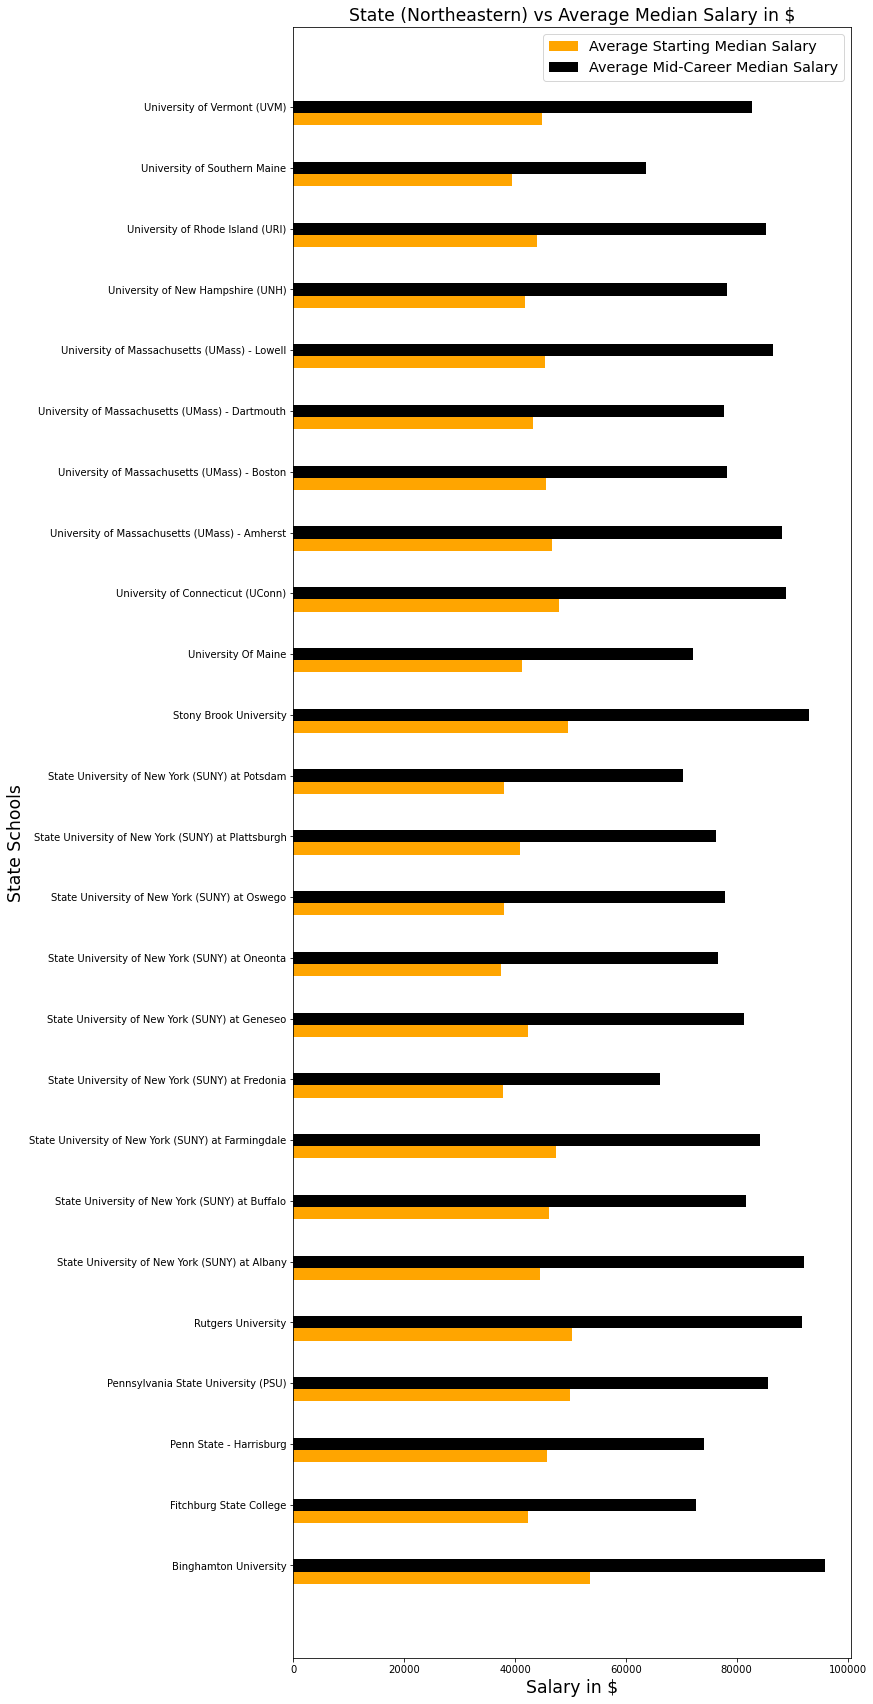

In [125]:
# State (Northeastern)
currGroup = stateByRegion.get_group(nor)
y_axis = currGroup.index
SMS = currGroup['Starting Median Salary'].astype(float)
MMS = currGroup['Mid-Career Median Salary'].astype(float)
ind = 10 * np.arange(len(y_axis))
wid = 2
plt.figure(figsize = (10,30))
plt.barh(ind, SMS, wid, label = "Average Starting Median Salary", color = 'orange')
plt.barh(ind + wid, MMS, wid, label = "Average Mid-Career Median Salary", color = 'black')
plt.title("State (Northeastern) vs Average Median Salary in $", fontsize = "xx-large")
plt.ylabel("State Schools", fontsize = "xx-large")
plt.xlabel("Salary in $", fontsize = "xx-large")
plt.yticks(ind + wid, y_axis, rotation = 'horizontal')
plt.legend(loc = 0, fontsize = "x-large")#, bbox_to_anchor = (1.15,1))
# plt.close()
plt.show()
# print(currGroup.loc[currGroup['Starting Median Salary'] == SMS.max()]['Starting Median Salary'], "\n")
# print(currGroup.loc[currGroup['Starting Median Salary'] == SMS.min()]['Starting Median Salary'], "\n\n")
# print(currGroup.loc[currGroup['Mid-Career Median Salary'] == MMS.max()]['Mid-Career Median Salary'], "\n")
# print(currGroup.loc[currGroup['Mid-Career Median Salary'] == MMS.min()]['Mid-Career Median Salary'])

<p style="font-size:250%">State (Southern) vs Average Median Salary in $</p>

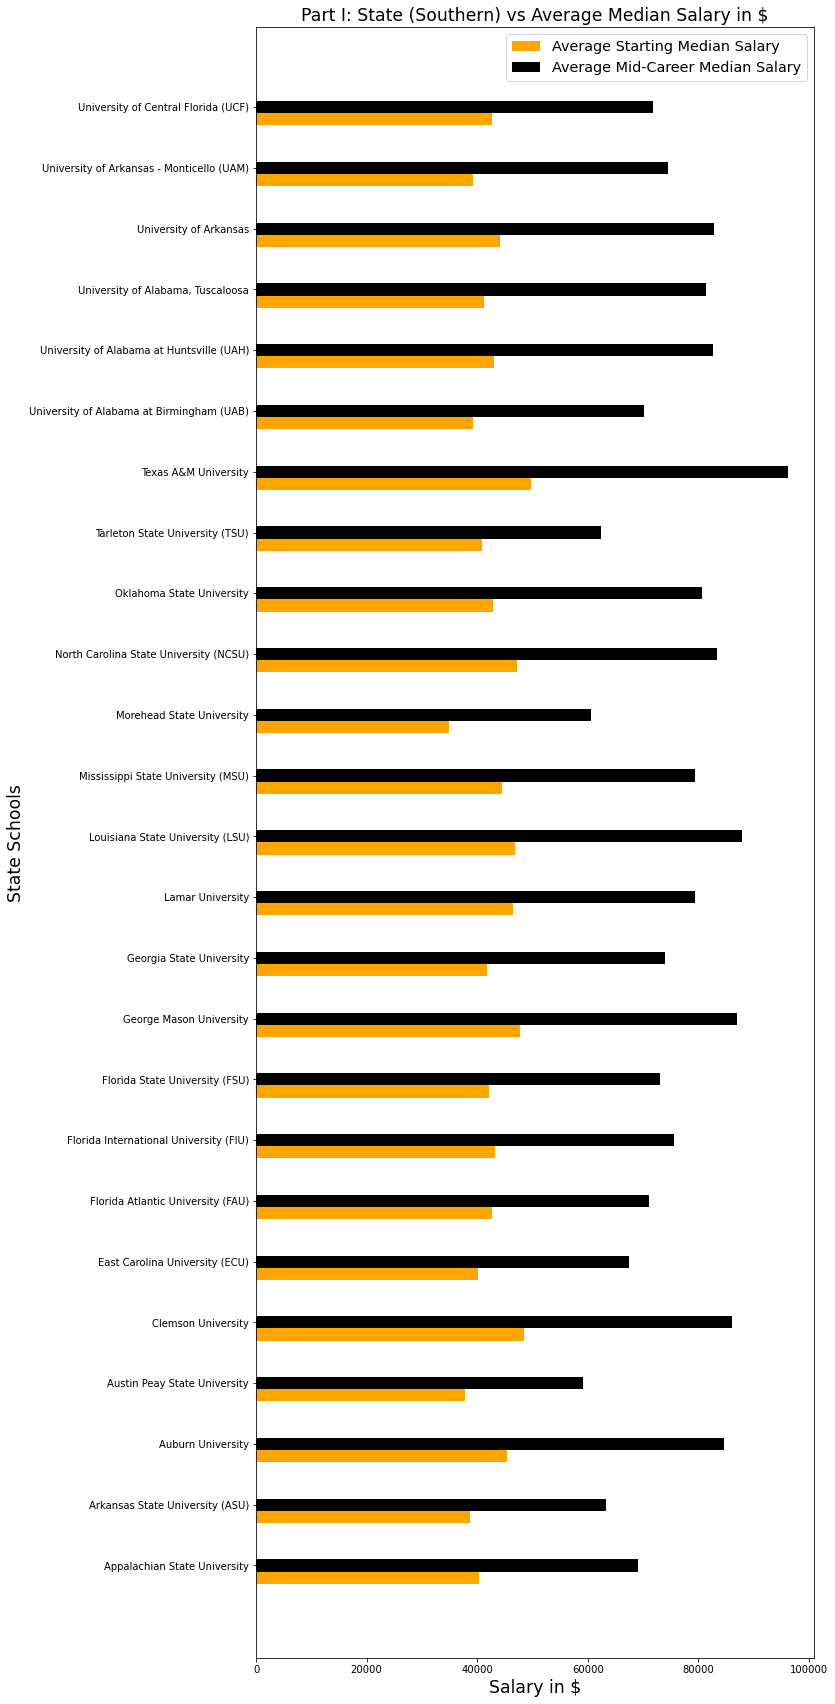

In [126]:
# State (Southern)
currGroup = stateByRegion.get_group(sou)
y_axis = currGroup.index[0:25]
SMS = currGroup['Starting Median Salary'].astype(float)[0:25]
MMS = currGroup['Mid-Career Median Salary'].astype(float)[0:25]
ind = 10 * np.arange(len(y_axis))
wid = 2
plt.figure(figsize = (10,30))
plt.barh(ind, SMS, wid, label = "Average Starting Median Salary", color = 'orange')
plt.barh(ind + wid, MMS, wid, label = "Average Mid-Career Median Salary", color = 'black')
plt.title("Part I: State (Southern) vs Average Median Salary in $", fontsize = "xx-large")
plt.ylabel("State Schools", fontsize = "xx-large")
plt.xlabel("Salary in $", fontsize = "xx-large")
plt.yticks(ind + wid, y_axis, rotation = 'horizontal')
plt.legend(loc = 0, fontsize = "x-large")#, bbox_to_anchor = (1.15,1))
# plt.close()
plt.show()
# print(currGroup.loc[currGroup['Starting Median Salary'] == SMS.max()]['Starting Median Salary'], "\n")
# print(currGroup.loc[currGroup['Starting Median Salary'] == SMS.min()]['Starting Median Salary'], "\n\n")
# print(currGroup.loc[currGroup['Mid-Career Median Salary'] == MMS.max()]['Mid-Career Median Salary'], "\n")
# print(currGroup.loc[currGroup['Mid-Career Median Salary'] == MMS.min()]['Mid-Career Median Salary'])

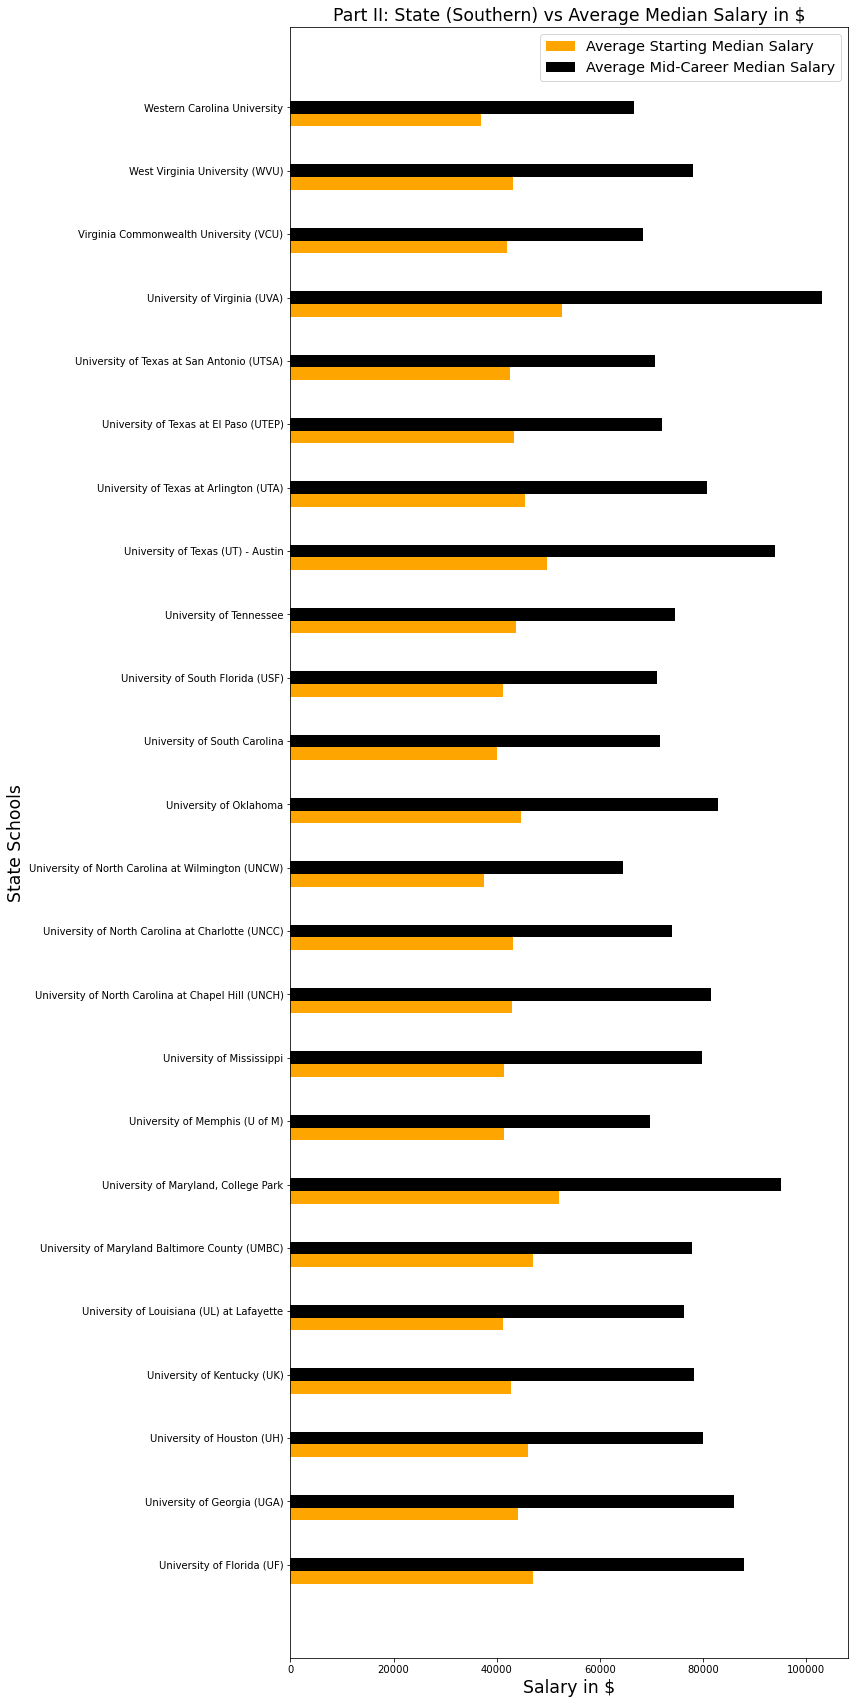

In [127]:
# State (Southern)
currGroup = stateByRegion.get_group(sou)
y_axis = currGroup.index[26:]
SMS = currGroup['Starting Median Salary'].astype(float)[26:]
MMS = currGroup['Mid-Career Median Salary'].astype(float)[26:]
ind = 10 * np.arange(len(y_axis))
wid = 2
plt.figure(figsize = (10,30))
plt.barh(ind, SMS, wid, label = "Average Starting Median Salary", color = 'orange')
plt.barh(ind + wid, MMS, wid, label = "Average Mid-Career Median Salary", color = 'black')
plt.title("Part II: State (Southern) vs Average Median Salary in $", fontsize = "xx-large")
plt.ylabel("State Schools", fontsize = "xx-large")
plt.xlabel("Salary in $", fontsize = "xx-large")
plt.yticks(ind + wid, y_axis, rotation = 'horizontal')
plt.legend(loc = 0, fontsize = "x-large")#, bbox_to_anchor = (1.15,1))
# plt.close()
plt.show()
# print(currGroup.loc[currGroup['Starting Median Salary'] == SMS.max()]['Starting Median Salary'], "\n")
# print(currGroup.loc[currGroup['Starting Median Salary'] == SMS.min()]['Starting Median Salary'], "\n\n")
# print(currGroup.loc[currGroup['Mid-Career Median Salary'] == MMS.max()]['Mid-Career Median Salary'], "\n")
# print(currGroup.loc[currGroup['Mid-Career Median Salary'] == MMS.min()]['Mid-Career Median Salary'])

<p style="font-size:250%">State (Western) vs Average Median Salary in $</p>

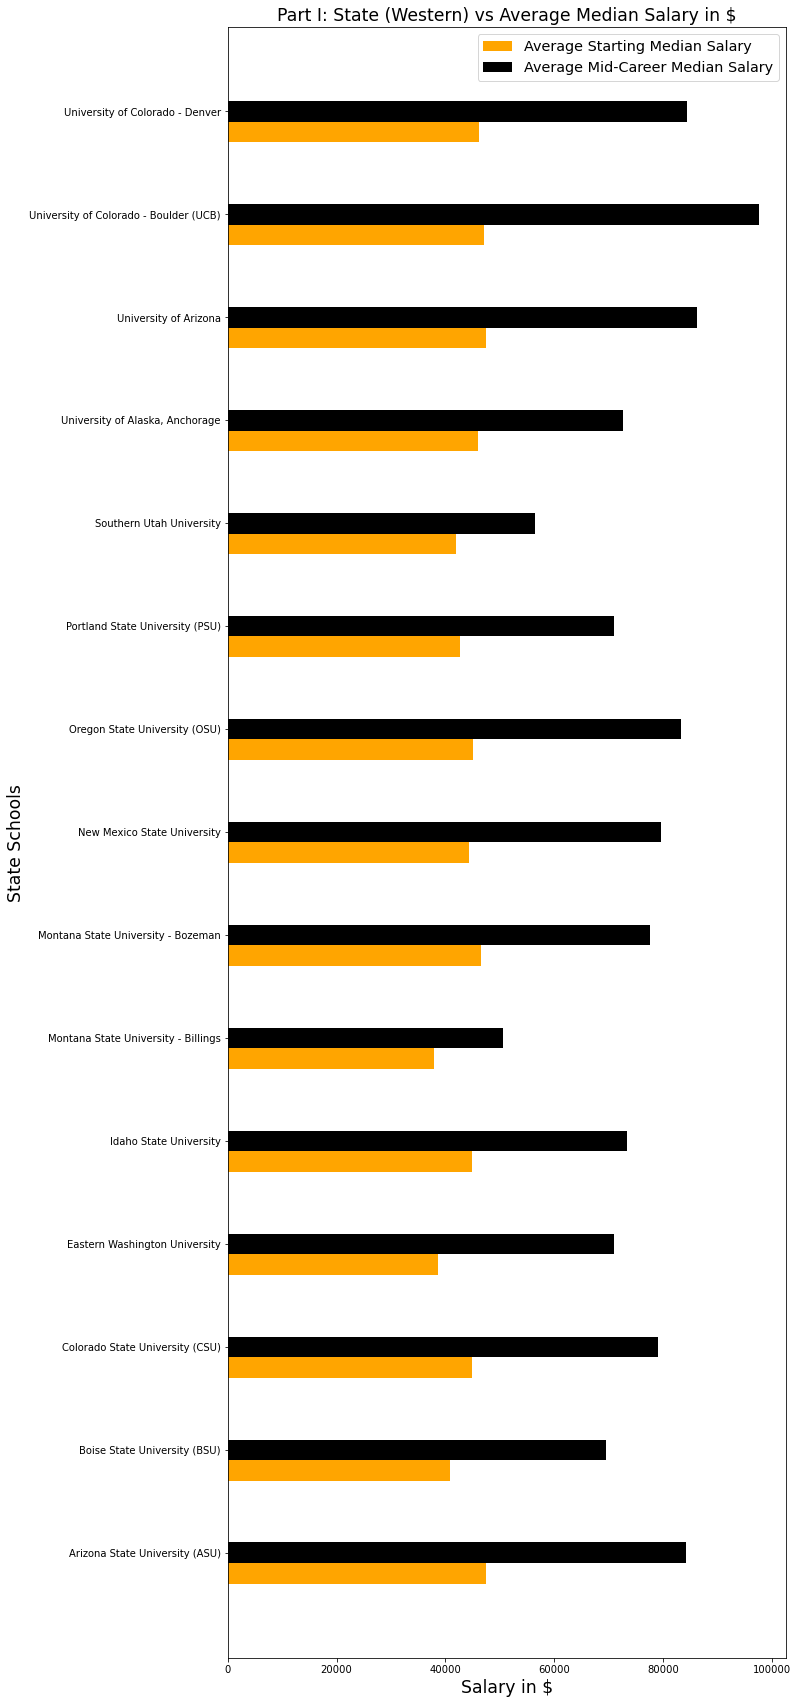

In [128]:
# State (Western)
currGroup = stateByRegion.get_group(wes)
y_axis = currGroup.index[0:15]
SMS = currGroup['Starting Median Salary'].astype(float)[0:15]
MMS = currGroup['Mid-Career Median Salary'].astype(float)[0:15]
ind = 10 * np.arange(len(y_axis))
wid = 2
plt.figure(figsize = (10,30))
plt.barh(ind, SMS, wid, label = "Average Starting Median Salary", color = 'orange')
plt.barh(ind + wid, MMS, wid, label = "Average Mid-Career Median Salary", color = 'black')
plt.title("Part I: State (Western) vs Average Median Salary in $", fontsize = "xx-large")
plt.ylabel("State Schools", fontsize = "xx-large")
plt.xlabel("Salary in $", fontsize = "xx-large")
plt.yticks(ind + wid, y_axis, rotation = 'horizontal')
plt.legend(loc = 0, fontsize = "x-large")#, bbox_to_anchor = (1.15,1))
plt.show()

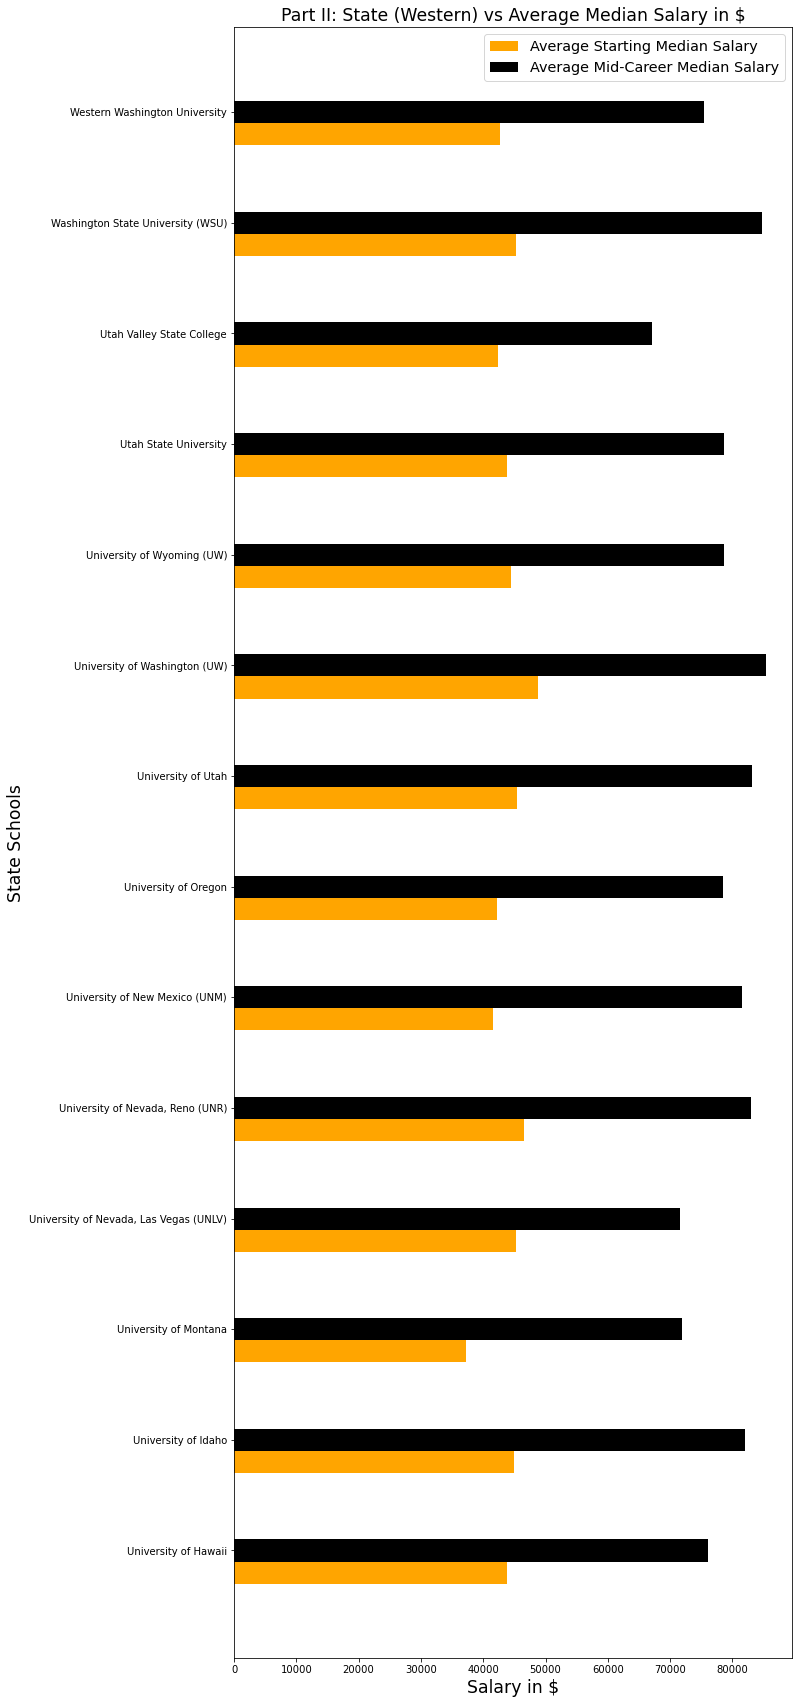

In [129]:
# State (Western)
currGroup = stateByRegion.get_group(wes)
y_axis = currGroup.index[15:]
SMS = currGroup['Starting Median Salary'].astype(float)[15:]
MMS = currGroup['Mid-Career Median Salary'].astype(float)[15:]
ind = 10 * np.arange(len(y_axis))
wid = 2
plt.figure(figsize = (10,30))
plt.barh(ind, SMS, wid, label = "Average Starting Median Salary", color = 'orange')
plt.barh(ind + wid, MMS, wid, label = "Average Mid-Career Median Salary", color = 'black')
plt.title("Part II: State (Western) vs Average Median Salary in $", fontsize = "xx-large")
plt.ylabel("State Schools", fontsize = "xx-large")
plt.xlabel("Salary in $", fontsize = "xx-large")
plt.yticks(ind + wid, y_axis, rotation = 'horizontal')
plt.legend(loc = 0, fontsize = "x-large")#, bbox_to_anchor = (1.15,1))
# plt.close()
plt.show()
# print(currGroup.loc[currGroup['Starting Median Salary'] == SMS.max()]['Starting Median Salary'], "\n")
# print(currGroup.loc[currGroup['Starting Median Salary'] == SMS.min()]['Starting Median Salary'], "\n\n")
# print(currGroup.loc[currGroup['Mid-Career Median Salary'] == MMS.max()]['Mid-Career Median Salary'], "\n")
# print(currGroup.loc[currGroup['Mid-Career Median Salary'] == MMS.min()]['Mid-Career Median Salary'])